## problem
### A Fast Moving Consumer Goods (FMCG) company entered into the instant noodles business twoyears back. Their higher management has noticed that there is a mismatch in the demand and supply. Where the demand is high, supply is pretty low and vice-versa which results in a loss in inventory cost and ultimately loss to the company. Hence, the higher management wants to optimize the supply quantity in each and every warehouse in the entire country.

## GOALS
### The objective of this exercise is to build a model, using historical data that will determine an optimum weight of the product to be shipped each time from the respective warehouse.

### 1. Focus on all steps of data science (EDA, data processing, model, evaluation, charts)
### 2. Highlight any trend in data, deep insight, novel steps that you take
### 3. Highlight next steps and improvements
### 4. Apply 5 to 6 machine learning algorithms and evaluate it

In [1]:
# !jupyter notebook --NotebookApp.max_buffer_size=10000000000


#### Importing Essential Modules and Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sklearn

### Read Dataset

In [3]:
df = pd.read_csv("supply_train.csv")
df

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,16615,WH_116615,EID_66615,Urban,Large,West,Zone 6,3,1,6,...,0,240,19.0,2009.0,14,0,B+,5,23,16094
16616,16616,WH_116616,EID_66616,Urban,Large,North,Zone 5,2,0,2,...,1,164,30.0,NaN,17,0,B+,6,24,21113
16617,16617,WH_116617,EID_66617,Rural,Large,North,Zone 6,5,0,4,...,1,211,24.0,2003.0,24,1,B,5,29,28117
16618,16618,WH_116618,EID_66618,Rural,Small,West,Zone 6,3,2,3,...,1,119,NaN,2007.0,16,0,A,5,15,21103


## EDA
#### EDA (Exploratory Data Analysis) is the process of analyzing and visualizing a dataset to understand its main characteristics before applying machine learning or statistical models. It helps in identifying patterns, trends, anomalies, and relationships within the data.

In [4]:
df.columns

Index(['Unnamed: 0', 'Ware_house_ID', 'WH_Manager_ID', 'Location_type',
       'WH_capacity_size', 'zone', 'WH_regional_zone', 'num_refill_req_l3m',
       'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num',
       'wh_owner_type', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [5]:
df.shape

(16620, 25)

In [6]:
df.index

RangeIndex(start=0, stop=16620, step=1)

In [7]:
df.size

415500

#### Understanding of attributes

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    16620 non-null  int64  
 1   Ware_house_ID                 16620 non-null  object 
 2   WH_Manager_ID                 16620 non-null  object 
 3   Location_type                 16620 non-null  object 
 4   WH_capacity_size              16620 non-null  object 
 5   zone                          16620 non-null  object 
 6   WH_regional_zone              16620 non-null  object 
 7   num_refill_req_l3m            16620 non-null  int64  
 8   transport_issue_l1y           16620 non-null  int64  
 9   Competitor_in_mkt             16620 non-null  int64  
 10  retail_shop_num               16620 non-null  int64  
 11  wh_owner_type                 16620 non-null  object 
 12  distributor_num               16620 non-null  int64  
 13  f

In [9]:
df.dtypes

Unnamed: 0                        int64
Ware_house_ID                    object
WH_Manager_ID                    object
Location_type                    object
WH_capacity_size                 object
zone                             object
WH_regional_zone                 object
num_refill_req_l3m                int64
transport_issue_l1y               int64
Competitor_in_mkt                 int64
retail_shop_num                   int64
wh_owner_type                    object
distributor_num                   int64
flood_impacted                    int64
flood_proof                       int64
electric_supply                   int64
dist_from_hub                     int64
workers_num                     float64
wh_est_year                     float64
storage_issue_reported_l3m        int64
temp_reg_mach                     int64
approved_wh_govt_certificate     object
wh_breakdown_l3m                  int64
govt_check_l3m                    int64
product_wg_ton                    int64


### Descriptive Statistics

In [10]:
df.describe()

,Unnamed: 0,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,15953.000000,8760.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000
mean,8309.500000,4.126655,0.780927,3.103129,4983.904994,42.473706,0.096871,0.056017,0.655716,163.521901,28.911490,2009.345320,17.127196,0.306137,3.491095,18.727377,22098.420096
std,4797.925072,2.606241,1.206351,1.147711,1051.032239,16.090000,0.295791,0.229961,0.475149,62.701193,7.842046,7.544672,9.163901,0.460901,1.688614,8.619857,11620.337346
min,0.000000,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2093.000000
25%,4154.750000,2.000000,0.000000,2.000000,4309.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,13057.000000
50%,8309.500000,4.000000,0.000000,3.000000,4856.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,19.000000,22099.000000
75%,12464.250000,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30103.000000
max,16619.000000,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


#### Unqiue values

In [11]:
df.nunique()

Unnamed: 0                      16620
Ware_house_ID                   16620
WH_Manager_ID                   16620
Location_type                       2
WH_capacity_size                    3
zone                                4
WH_regional_zone                    6
num_refill_req_l3m                  9
transport_issue_l1y                 6
Competitor_in_mkt                  12
retail_shop_num                  4356
wh_owner_type                       2
distributor_num                    56
flood_impacted                      2
flood_proof                         2
electric_supply                     2
dist_from_hub                     217
workers_num                        60
wh_est_year                        28
storage_issue_reported_l3m         37
temp_reg_mach                       2
approved_wh_govt_certificate        5
wh_breakdown_l3m                    7
govt_check_l3m                     32
product_wg_ton                   4248
dtype: int64

In [12]:
df.Ware_house_ID.nunique()

16620

In [13]:
df.WH_Manager_ID.nunique()

16620

### Data Cleaning (Handling Missing Values)

In [14]:
df.isnull().sum()

Unnamed: 0                         0
Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      667
wh_est_year                     7860
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     599
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [15]:
df.workers_num

0        29.0
1        31.0
2        37.0
3        21.0
4        25.0
         ... 
16615    19.0
16616    30.0
16617    24.0
16618     NaN
16619    34.0
Name: workers_num, Length: 16620, dtype: float64

In [16]:
df['workers_num'].fillna(df['workers_num'].median(),inplace = True)

In [17]:
df.isnull().sum()

Unnamed: 0                         0
Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                        0
wh_est_year                     7860
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     599
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

#### dropping the column wh_est_year feature as there is estimated 47% of missing data there is no need to predict this

In [18]:
df.drop(columns = 'wh_est_year',inplace = True)

In [19]:
df.isnull().sum()

Unnamed: 0                        0
Ware_house_ID                     0
WH_Manager_ID                     0
Location_type                     0
WH_capacity_size                  0
zone                              0
WH_regional_zone                  0
num_refill_req_l3m                0
transport_issue_l1y               0
Competitor_in_mkt                 0
retail_shop_num                   0
wh_owner_type                     0
distributor_num                   0
flood_impacted                    0
flood_proof                       0
electric_supply                   0
dist_from_hub                     0
workers_num                       0
storage_issue_reported_l3m        0
temp_reg_mach                     0
approved_wh_govt_certificate    599
wh_breakdown_l3m                  0
govt_check_l3m                    0
product_wg_ton                    0
dtype: int64

##### the missing values in approved_wh_govt_certificate is low so we can use mode (for categorical values)

In [20]:
df.approved_wh_govt_certificate.value_counts()

approved_wh_govt_certificate
C     3638
B+    3260
B     3220
A     3132
A+    2771
Name: count, dtype: int64

In [21]:
df['approved_wh_govt_certificate'].mode()

0    C
Name: approved_wh_govt_certificate, dtype: object

In [22]:
df.fillna({'approved_wh_govt_certificate': df['approved_wh_govt_certificate'].mode()[0]}, inplace=True)

In [23]:
df.isnull().sum()

Unnamed: 0                      0
Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

#### checking duplicate values

In [24]:
df.duplicated().sum()

np.int64(0)

#### dropping the column un-named

In [25]:
df.drop(columns = ['Unnamed: 0','Ware_house_ID', 'WH_Manager_ID'],inplace = True)

In [26]:
df.columns

Index(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'wh_owner_type', 'distributor_num', 'flood_impacted',
       'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

### Variable transformation : converting data types

In [27]:
before = df.dtypes
before

Location_type                    object
WH_capacity_size                 object
zone                             object
WH_regional_zone                 object
num_refill_req_l3m                int64
transport_issue_l1y               int64
Competitor_in_mkt                 int64
retail_shop_num                   int64
wh_owner_type                    object
distributor_num                   int64
flood_impacted                    int64
flood_proof                       int64
electric_supply                   int64
dist_from_hub                     int64
workers_num                     float64
storage_issue_reported_l3m        int64
temp_reg_mach                     int64
approved_wh_govt_certificate     object
wh_breakdown_l3m                  int64
govt_check_l3m                    int64
product_wg_ton                    int64
dtype: object

In [28]:
# converting dtypes using astype
df["Location_type"] = df["Location_type"].astype('category')
df["WH_capacity_size"] = df["WH_capacity_size"].astype('category')
df["zone"] = df["zone"].astype('category')
df["WH_regional_zone"] = df["WH_regional_zone"].astype('category')
df["wh_owner_type"] = df["wh_owner_type"].astype('category')
df["approved_wh_govt_certificate"] = df["approved_wh_govt_certificate"].astype('category')

In [29]:
after = df.dtypes
after

Location_type                   category
WH_capacity_size                category
zone                            category
WH_regional_zone                category
num_refill_req_l3m                 int64
transport_issue_l1y                int64
Competitor_in_mkt                  int64
retail_shop_num                    int64
wh_owner_type                   category
distributor_num                    int64
flood_impacted                     int64
flood_proof                        int64
electric_supply                    int64
dist_from_hub                      int64
workers_num                      float64
storage_issue_reported_l3m         int64
temp_reg_mach                      int64
approved_wh_govt_certificate    category
wh_breakdown_l3m                   int64
govt_check_l3m                     int64
product_wg_ton                     int64
dtype: object

## Univariates Analysis
#### Univariate analysis involves examining the distribution, central tendency, and dispersion of a single variable (feature) in a dataset. It helps in understanding the data's behavior and identifying patterns, outliers, and possible data quality issues.

### Univariate analysis For Categorical Columns

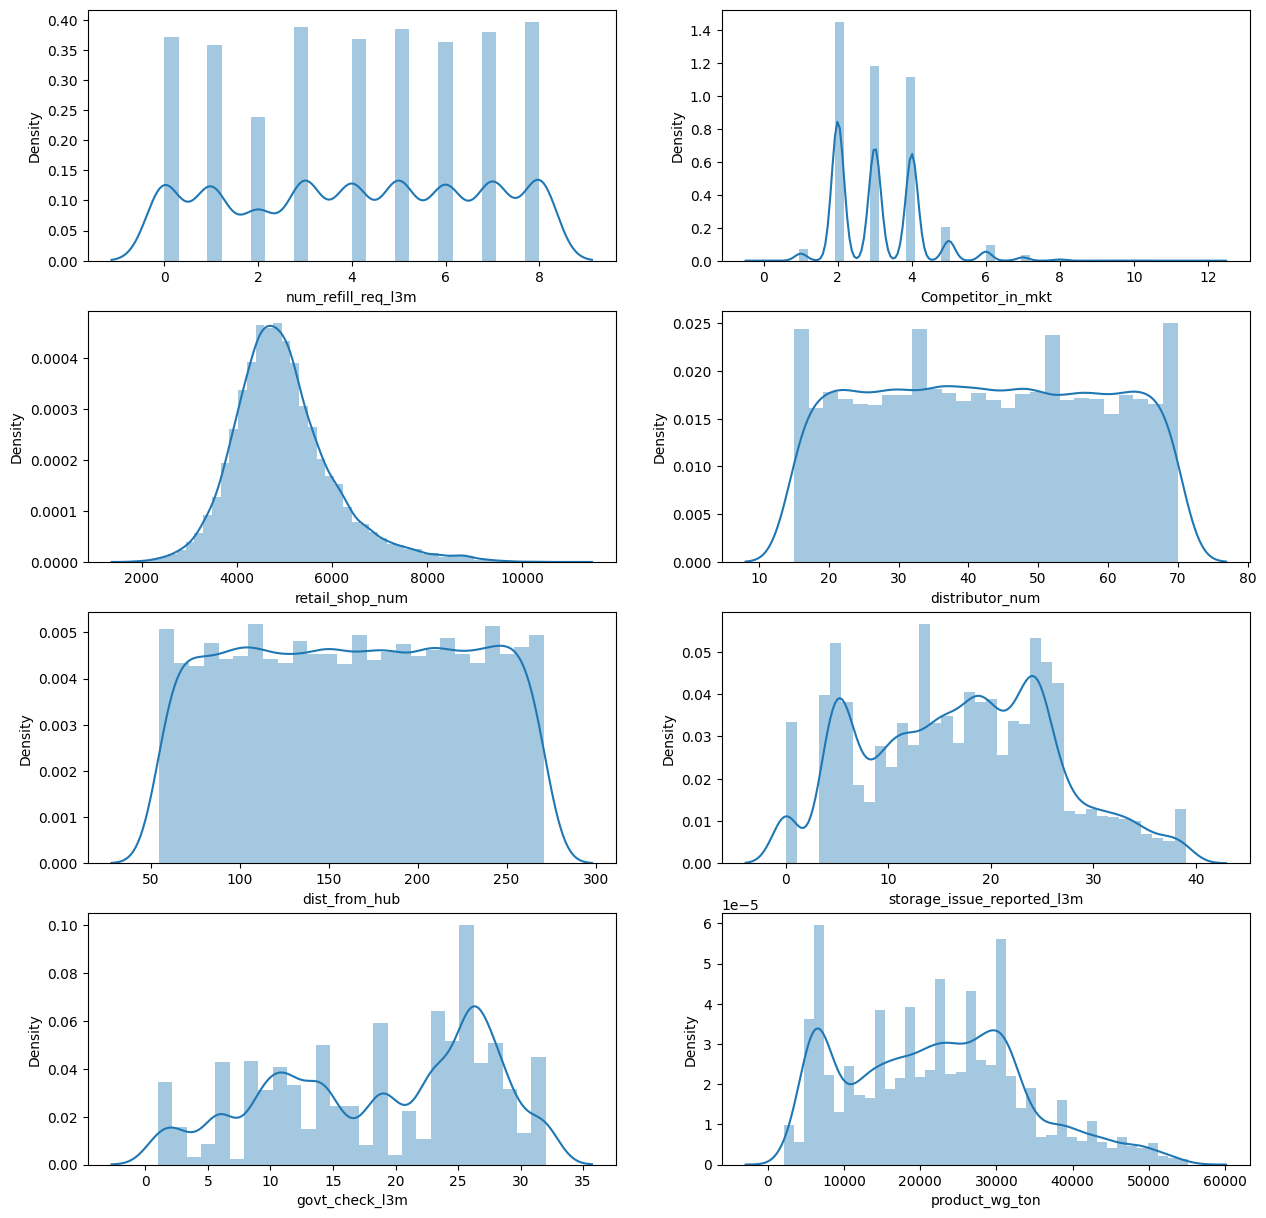

In [30]:
from warnings import filterwarnings
filterwarnings("ignore")


# check numerial values
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15,15)
sns.distplot(df['num_refill_req_l3m'],kde=True, ax=axes[0][0])
sns.distplot(df['Competitor_in_mkt'] , kde=True, ax=axes[0][1])
sns.distplot(df['retail_shop_num'] , kde=True, ax=axes[1][0])
sns.distplot(df['distributor_num'] , kde=True, ax=axes[1][1])
sns.distplot(df['dist_from_hub'] , kde=True, ax=axes[2][0])
sns.distplot(df['storage_issue_reported_l3m'] , kde=True, ax=axes[2][1])
sns.distplot(df['govt_check_l3m'] , kde=True, ax=axes[3][0])
sns.distplot(df['product_wg_ton'] , kde=True, ax=axes[3][1])
plt.show()

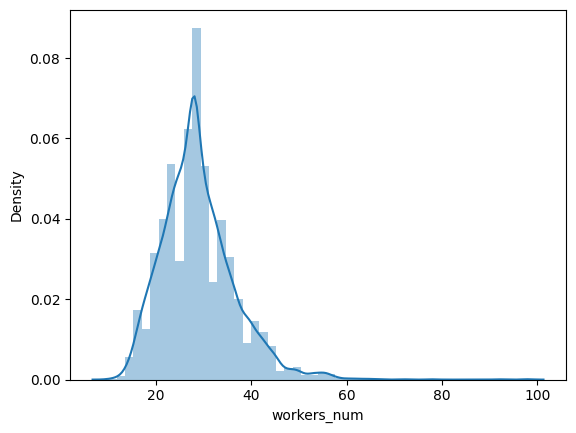

In [31]:
sns.distplot(df['workers_num'] , kde=True)
plt.show()

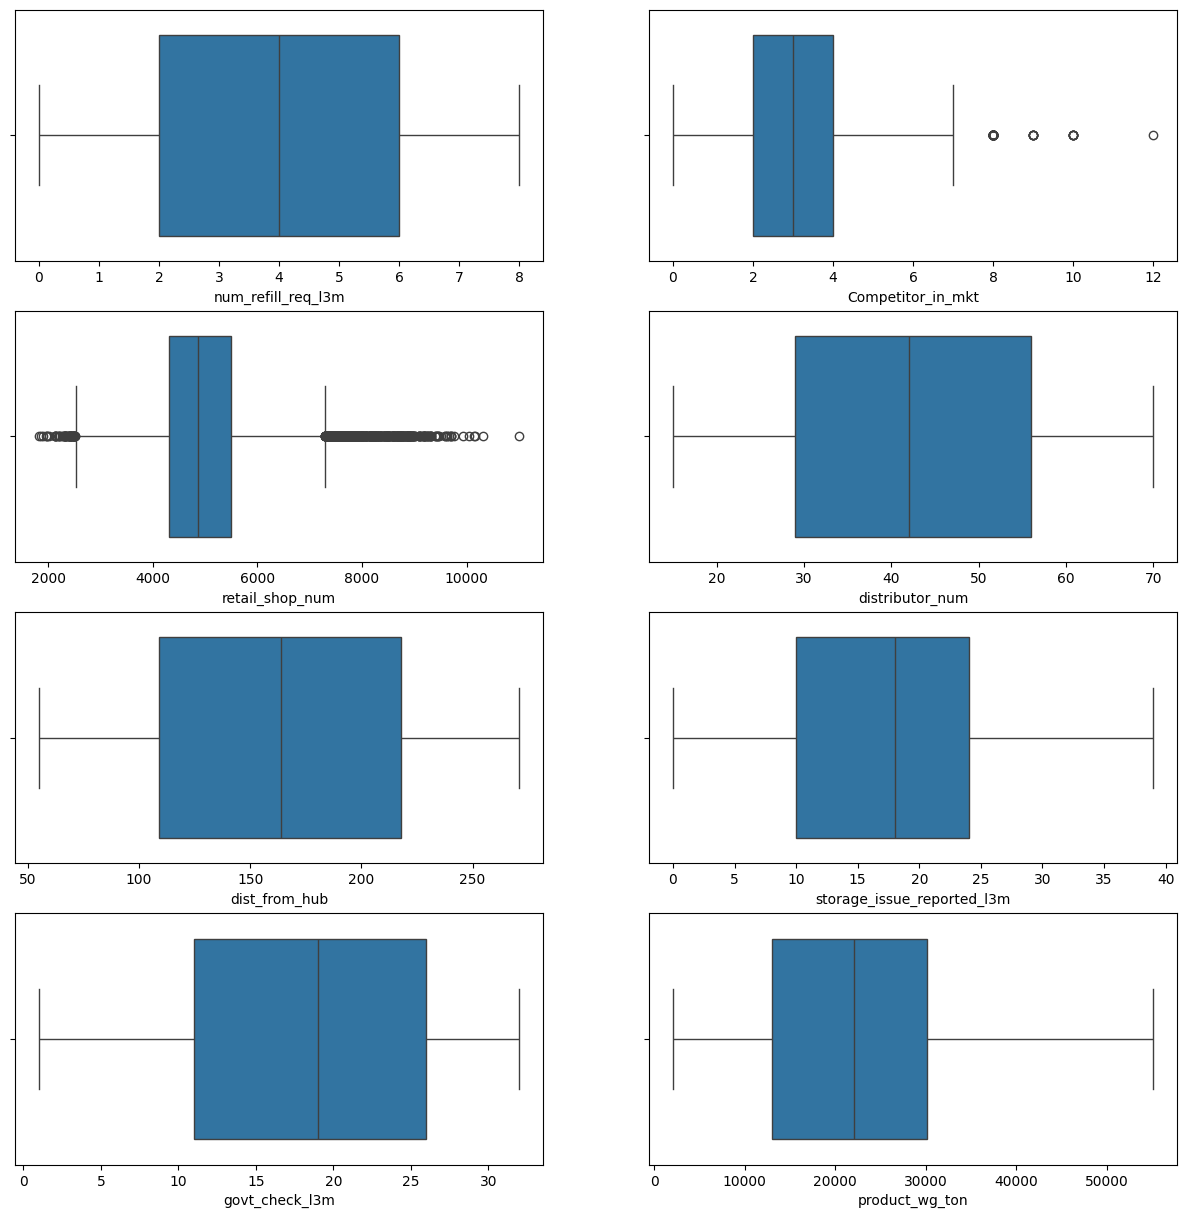

In [32]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15,15)
sns.boxplot(x='num_refill_req_l3m',data=df,ax=axes[0][0])
sns.boxplot(x='Competitor_in_mkt',data=df,ax=axes[0][1])
sns.boxplot(x='retail_shop_num',data=df,ax=axes[1][0])
sns.boxplot(x='distributor_num',data=df,ax=axes[1][1])
sns.boxplot(x='dist_from_hub',data=df,ax=axes[2][0])
sns.boxplot(x='storage_issue_reported_l3m',data=df, ax=axes[2][1])
sns.boxplot(x='govt_check_l3m',data=df,ax=axes[3][0])
sns.boxplot(x='product_wg_ton',data=df,ax=axes[3][1])
plt.show()

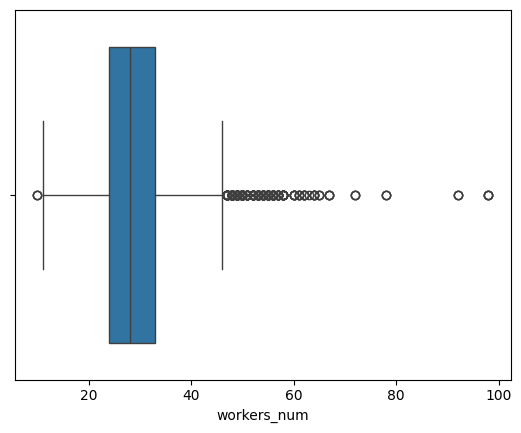

In [33]:
sns.boxplot(x='workers_num', data=df)
plt.show()

<Axes: xlabel='wh_breakdown_l3m', ylabel='count'>

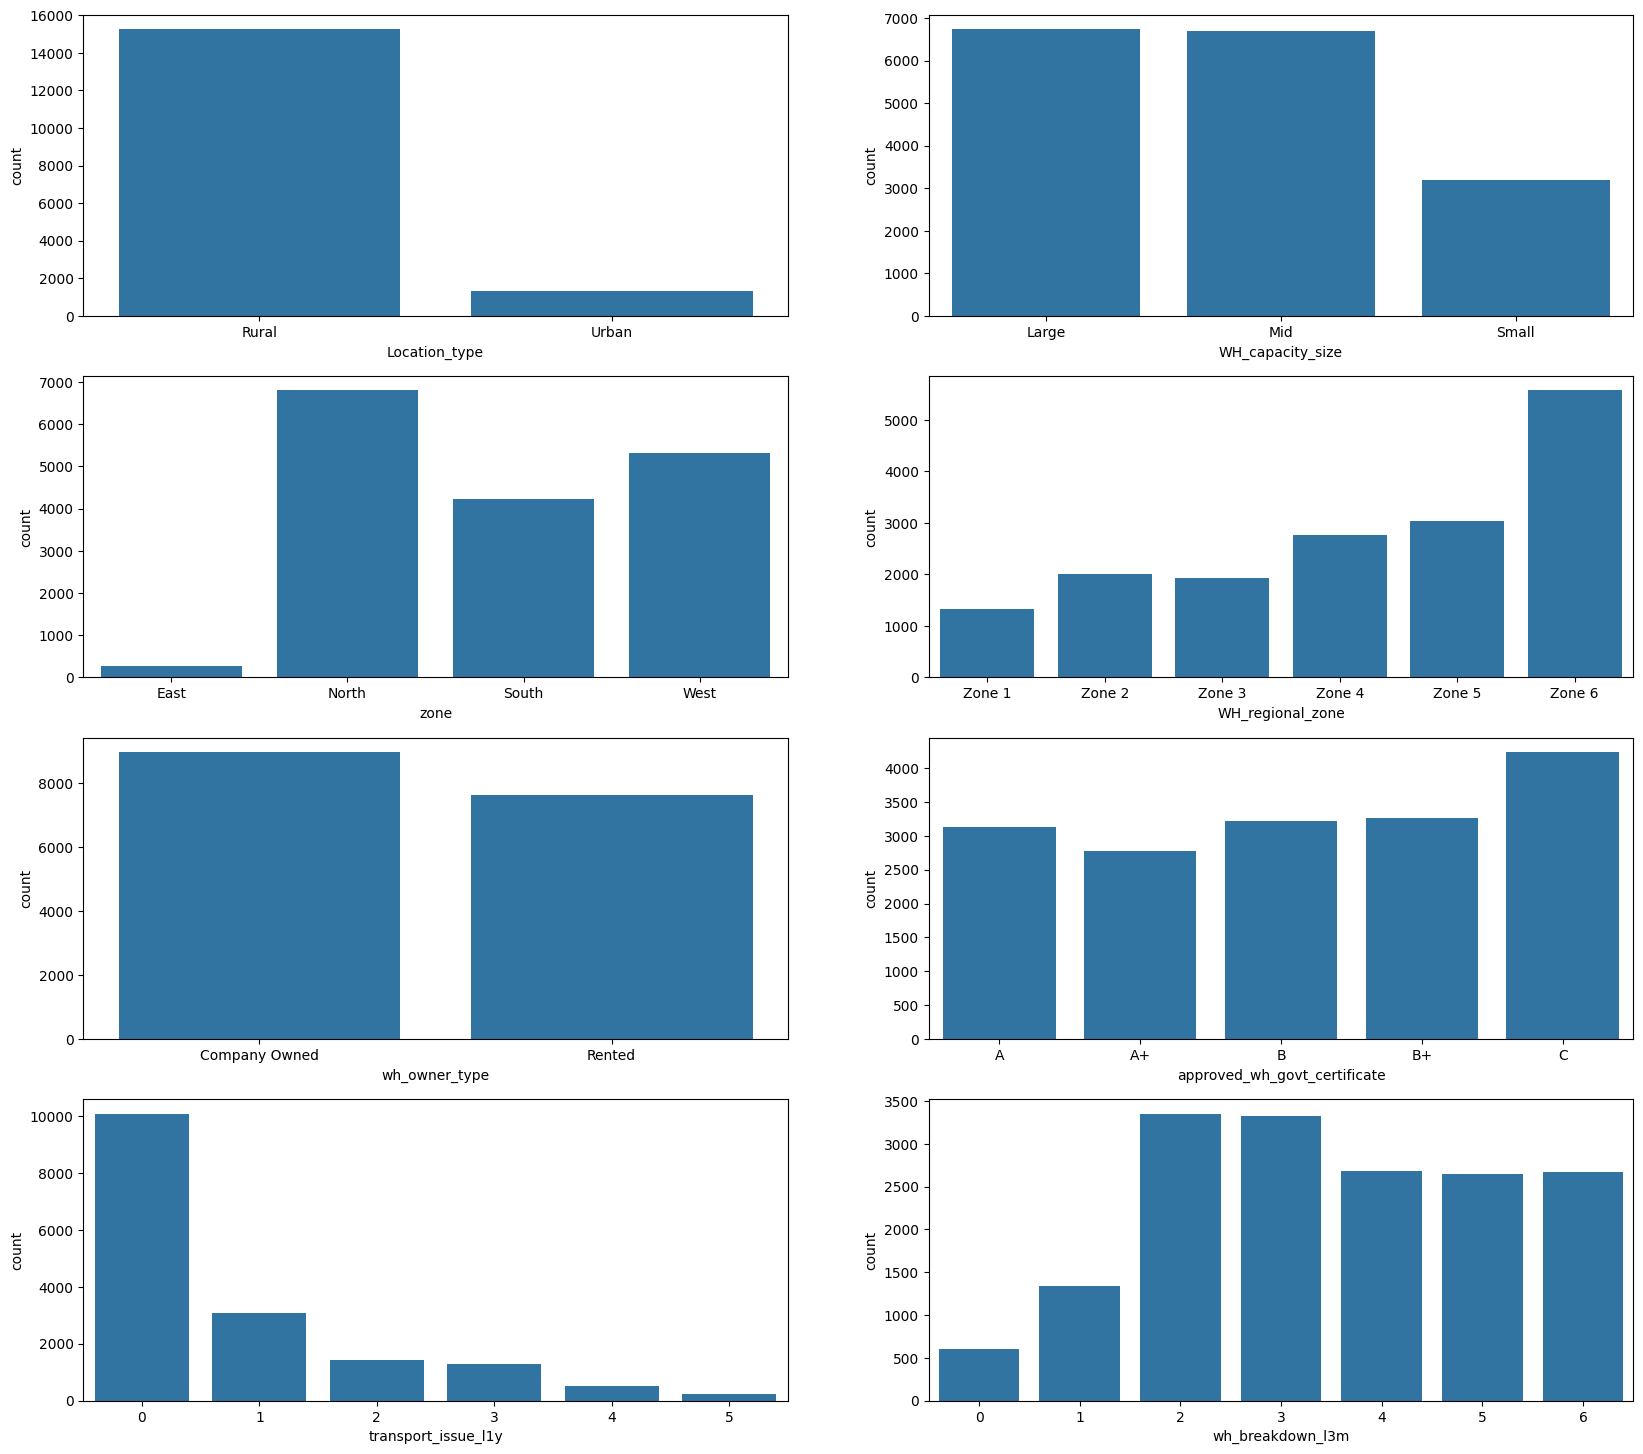

In [34]:
# check category

fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(20,18)
sns.countplot(x='Location_type',data=df,ax=axes[0][0])
sns.countplot(x='WH_capacity_size',data=df,ax=axes[0][1])
sns.countplot(x='zone',data=df,ax=axes[1][0])
sns.countplot(x='WH_regional_zone',data=df,ax=axes[1][1])
sns.countplot(x='wh_owner_type',data=df,ax=axes[2][0])
sns.countplot(x='approved_wh_govt_certificate',data=df,ax=axes[2][1])
sns.countplot(x='transport_issue_l1y',data=df,ax=axes[3][0])
sns.countplot(x='wh_breakdown_l3m',data=df,ax=axes[3][1])

#### 1. Location Type (Urban vs Rural)

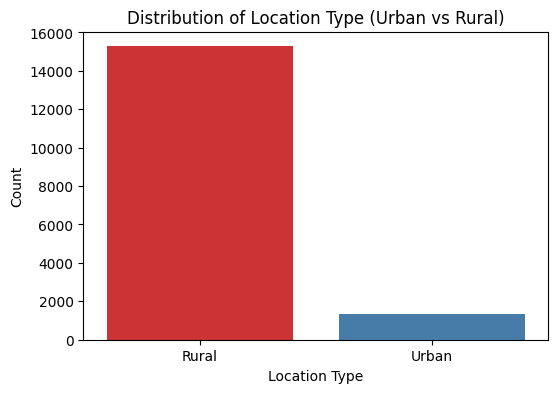

In [35]:
plt.figure(figsize=(6,4))
sns.countplot(x='Location_type', data=df, hue='Location_type',palette='Set1')
plt.title('Distribution of Location Type (Urban vs Rural)')
plt.xlabel('Location Type')
plt.ylabel('Count')
plt.show()

#### 2. Warehouse Capacity Size

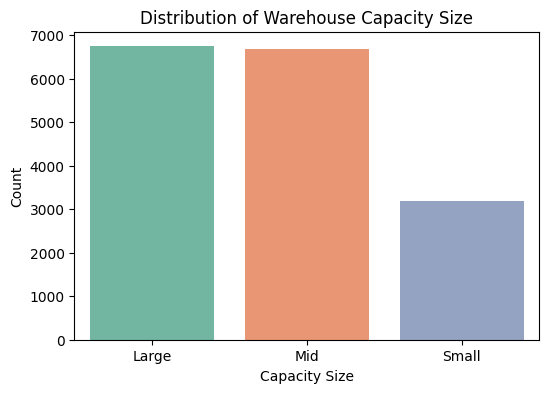

In [36]:
plt.figure(figsize=(6,4))
sns.countplot(x='WH_capacity_size', data=df, hue='WH_capacity_size', palette='Set2')
plt.title('Distribution of Warehouse Capacity Size')
plt.xlabel('Capacity Size')
plt.ylabel('Count')
plt.show()

#### 3. Ownership Type (Rented vs Company Owned)

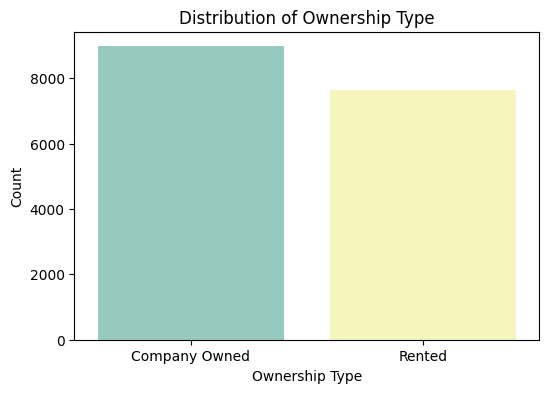

In [37]:
plt.figure(figsize=(6,4))
sns.countplot(x='wh_owner_type', data=df, hue='wh_owner_type', palette='Set3')
plt.title('Distribution of Ownership Type')
plt.xlabel('Ownership Type')
plt.ylabel('Count')
plt.show()

#### 4.Zone-wise Distribution

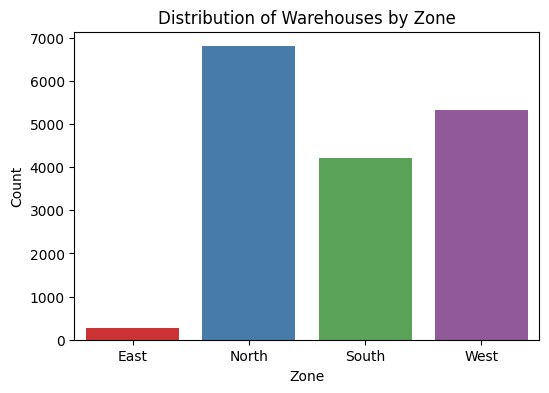

In [38]:
plt.figure(figsize=(6,4))
sns.countplot(x='zone', data=df, hue='zone', palette='Set1')
plt.title('Distribution of Warehouses by Zone')
plt.xlabel('Zone')
plt.ylabel('Count')
plt.show()

#### 5.Regional Zone Analysis

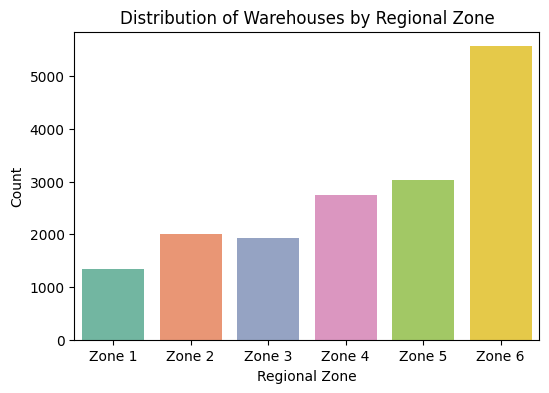

In [39]:
plt.figure(figsize=(6,4))
sns.countplot(x='WH_regional_zone', data=df, hue='WH_regional_zone', palette='Set2',)
plt.title('Distribution of Warehouses by Regional Zone')
plt.xlabel('Regional Zone')
plt.ylabel('Count')
#plt.xticks(rotation=90)
plt.show()

#### 6.Govt Approved Certificates Analysis

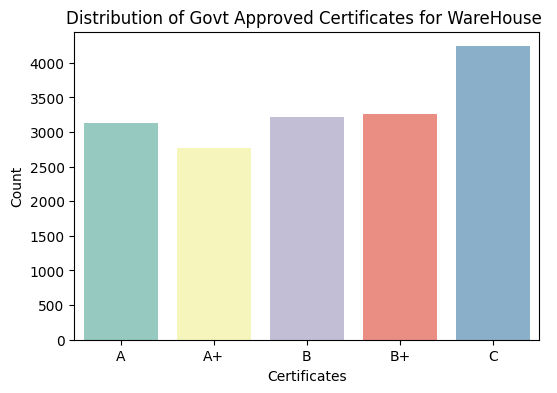

In [40]:
plt.figure(figsize=(6,4))
sns.countplot(x='approved_wh_govt_certificate', data=df, hue='approved_wh_govt_certificate', palette='Set3',)
plt.title('Distribution of Govt Approved Certificates for WareHouse ')
plt.xlabel('Certificates')
plt.ylabel('Count')
#plt.xticks(rotation=90)
plt.show()

### Univariate analysis For Numerical Columns

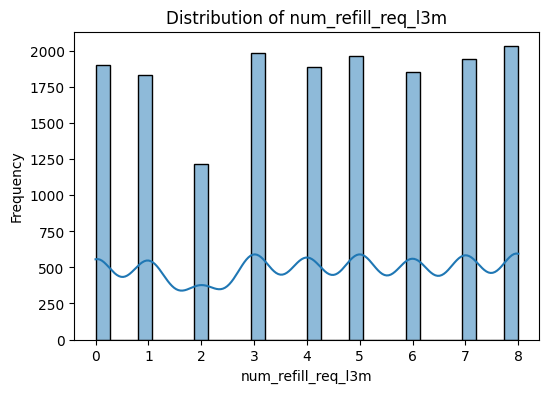

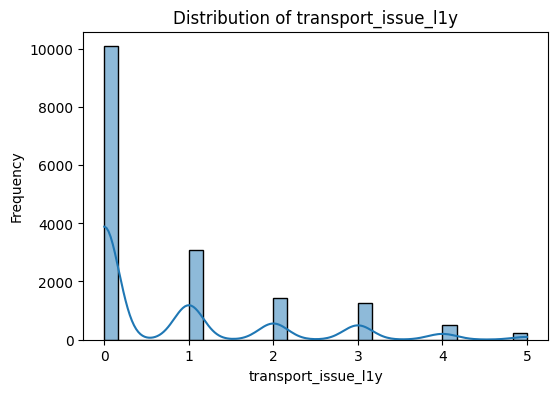

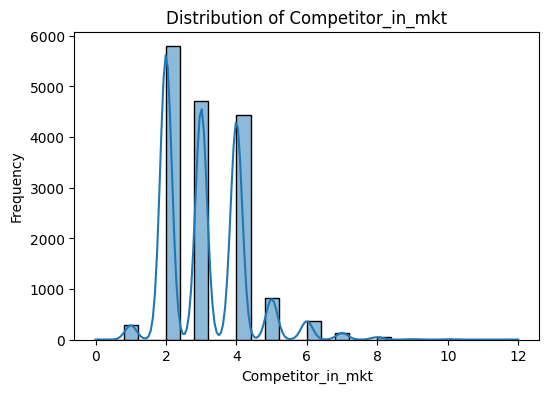

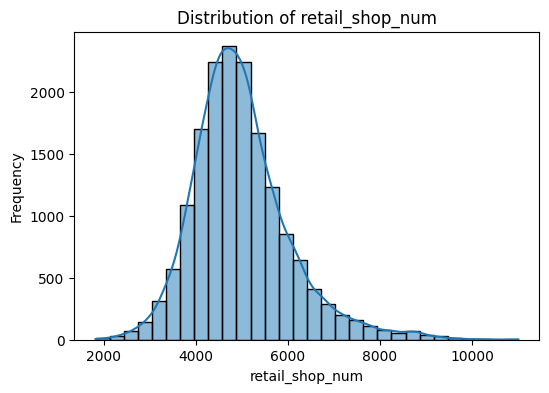

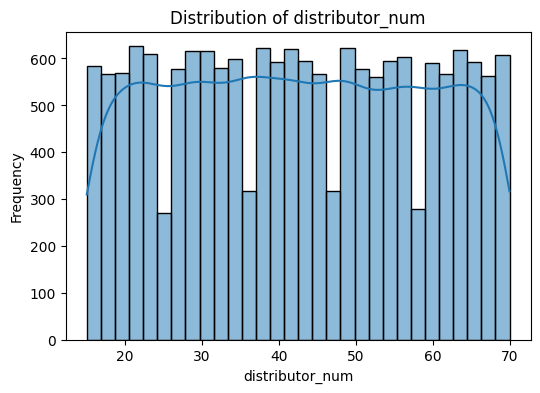

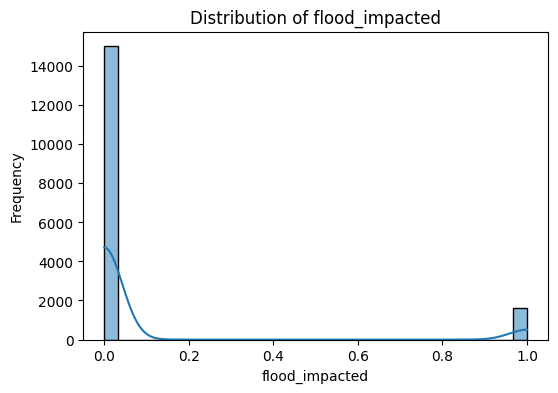

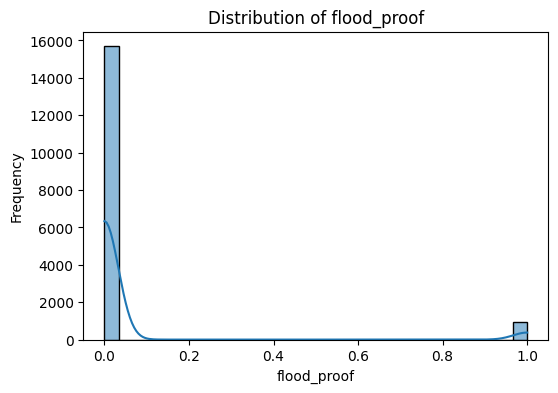

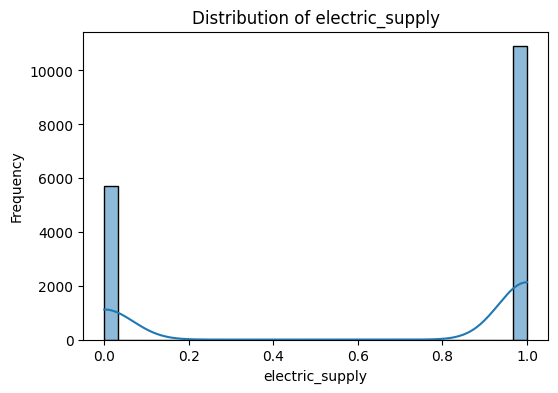

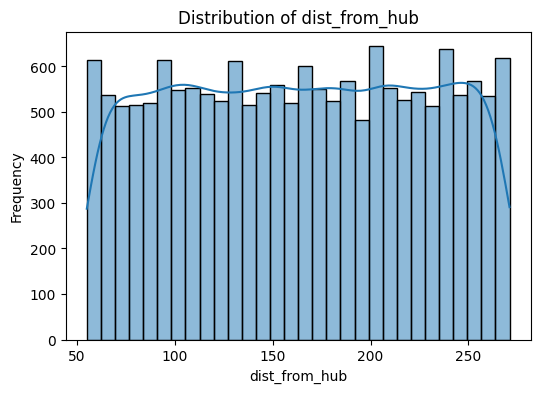

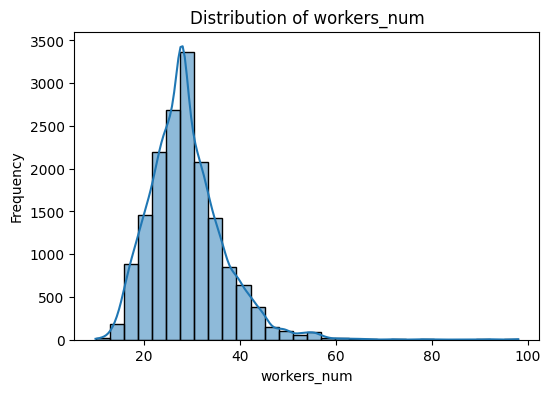

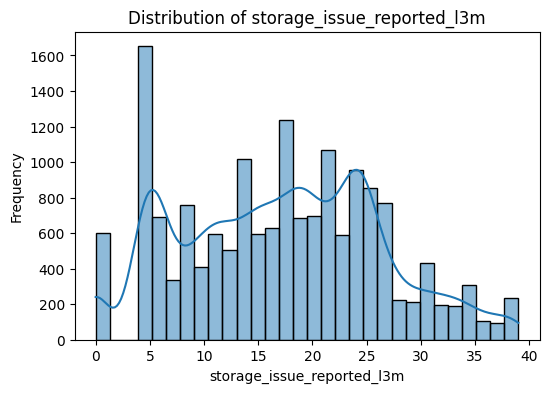

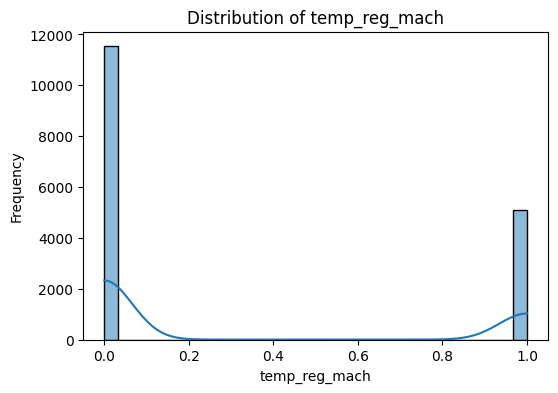

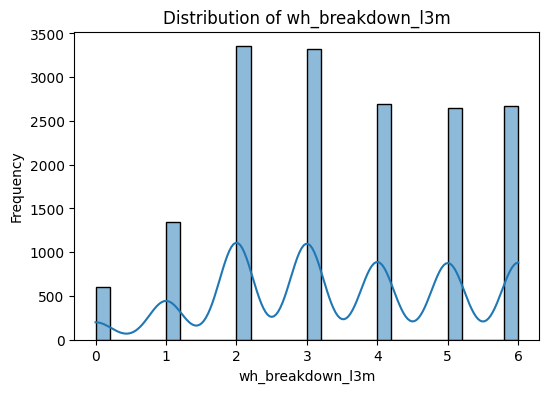

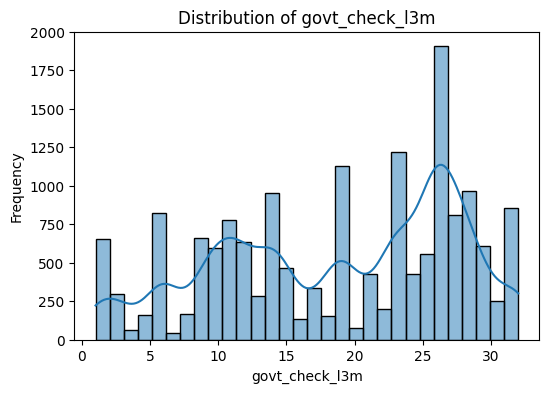

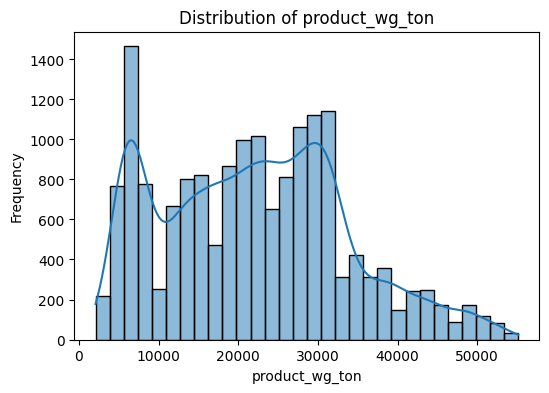

In [41]:
#### List of numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Generate separate histograms for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

## Bivariate Analysis

### Bivariate analysis involves analyzing the relationship between two variables to understand the association, correlation, or causation between them. It helps in exploring how one variable affects or is related to another.

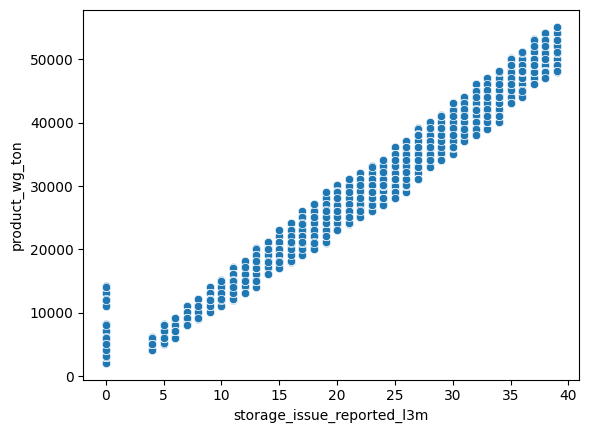

In [42]:
sns.scatterplot(x='storage_issue_reported_l3m', y="product_wg_ton", data=df)
plt.show()

###  1. Numerical vs Numerical Analysis

#### *.Scatter Plot: product_wg_ton vs workers_num

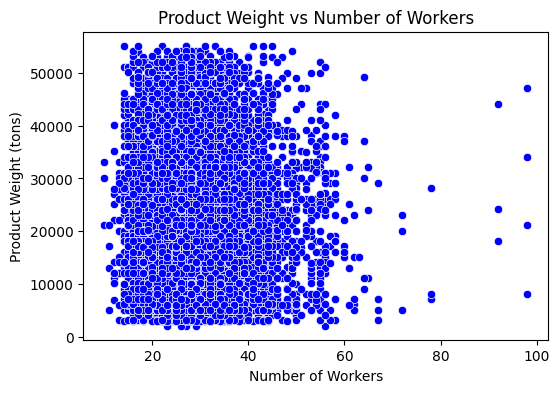

In [43]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='workers_num', y='product_wg_ton', data=df, color='blue')
plt.title('Product Weight vs Number of Workers')
plt.xlabel('Number of Workers')
plt.ylabel('Product Weight (tons)')
plt.show()

#### *Scatter Plot: dist_from_hub vs num_refill_req_l3m

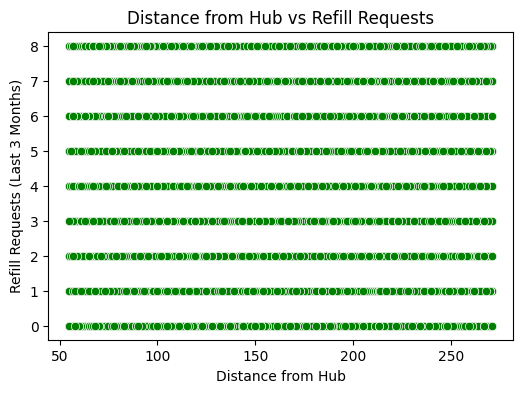

In [44]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='dist_from_hub', y='num_refill_req_l3m', data=df, color='green')
plt.title('Distance from Hub vs Refill Requests')
plt.xlabel('Distance from Hub')
plt.ylabel('Refill Requests (Last 3 Months)')
plt.show()

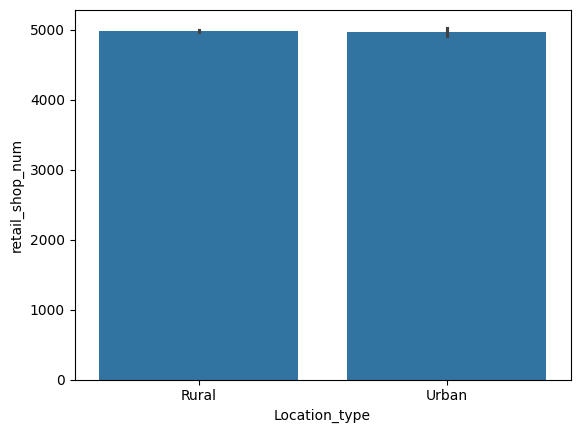

In [45]:
sns.barplot(x='Location_type',y='retail_shop_num',data=df)
plt.show()

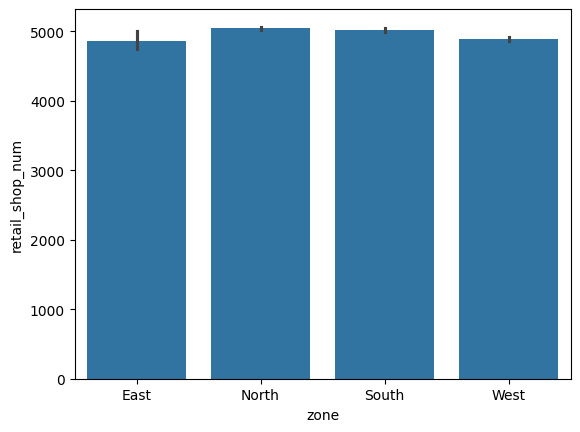

In [46]:
sns.barplot(x='zone',y='retail_shop_num',data=df)
plt.show()

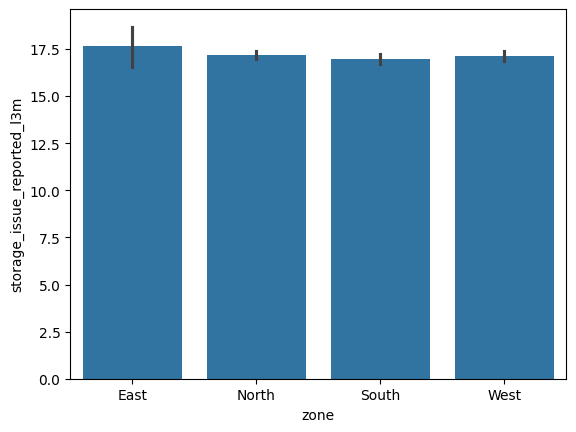

In [47]:
sns.barplot(x='zone',y='storage_issue_reported_l3m',data=df)
plt.show()

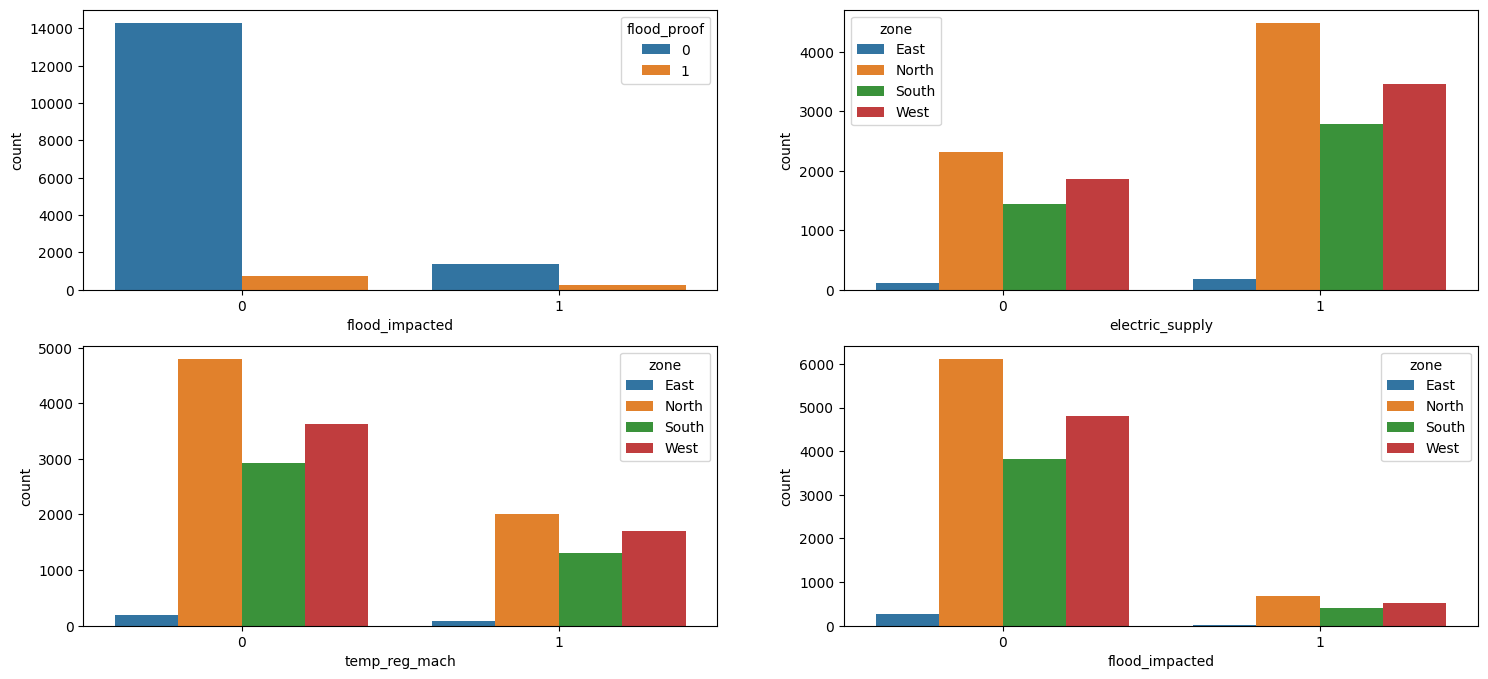

In [48]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(18,8)
sns.countplot(x='flood_impacted',hue='flood_proof', data=df,ax=axes[0][0])
sns.countplot(x='electric_supply',hue='zone', data=df,ax=axes[0][1])
sns.countplot(x='temp_reg_mach',hue='zone', data=df,ax=axes[1][0])
sns.countplot(x='flood_impacted',hue='zone', data=df,ax=axes[1][1])
plt.show()

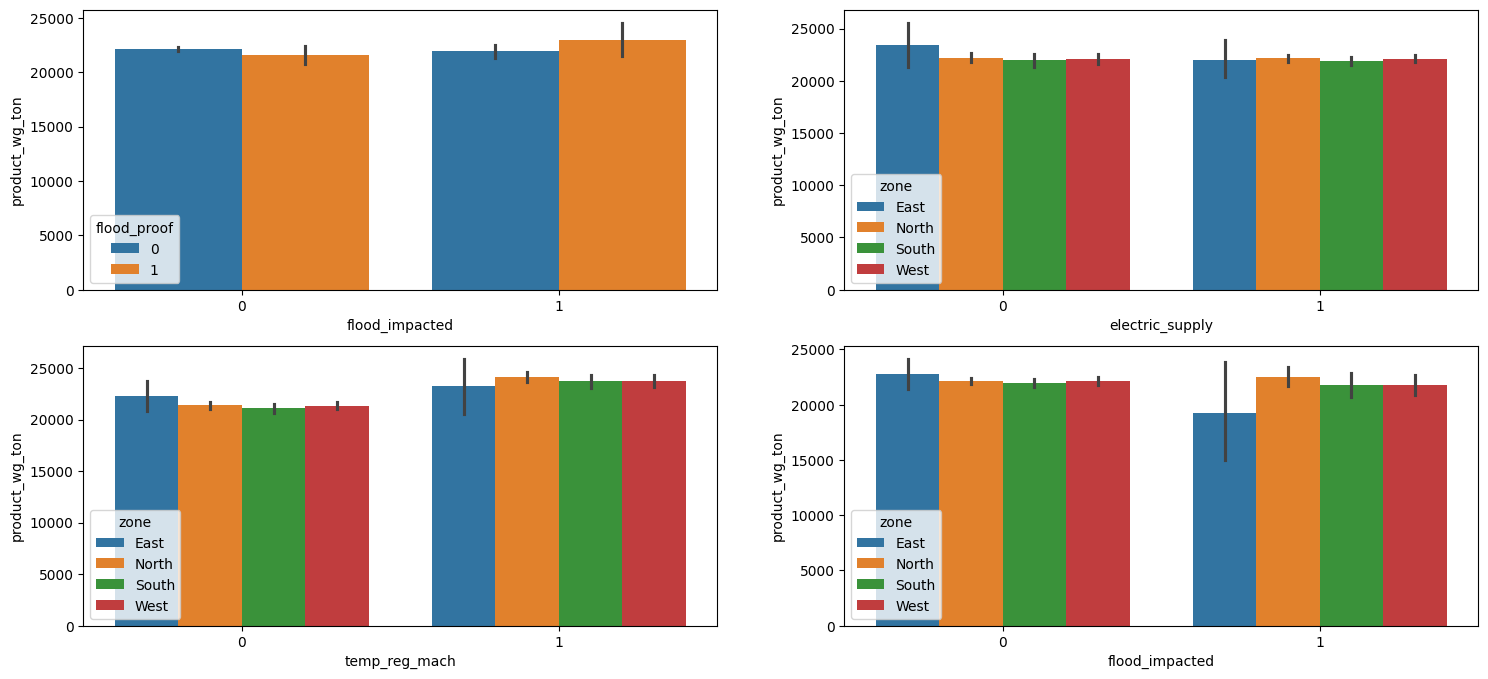

In [49]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(18,8)
sns.barplot(x='flood_impacted',y='product_wg_ton',hue='flood_proof', data=df,ax=axes[0][0])
sns.barplot(x='electric_supply',y='product_wg_ton',hue='zone', data=df,ax=axes[0][1])
sns.barplot(x='temp_reg_mach',y='product_wg_ton',hue='zone', data=df,ax=axes[1][0])
sns.barplot(x='flood_impacted',y='product_wg_ton',hue='zone', data=df,ax=axes[1][1])
plt.show()

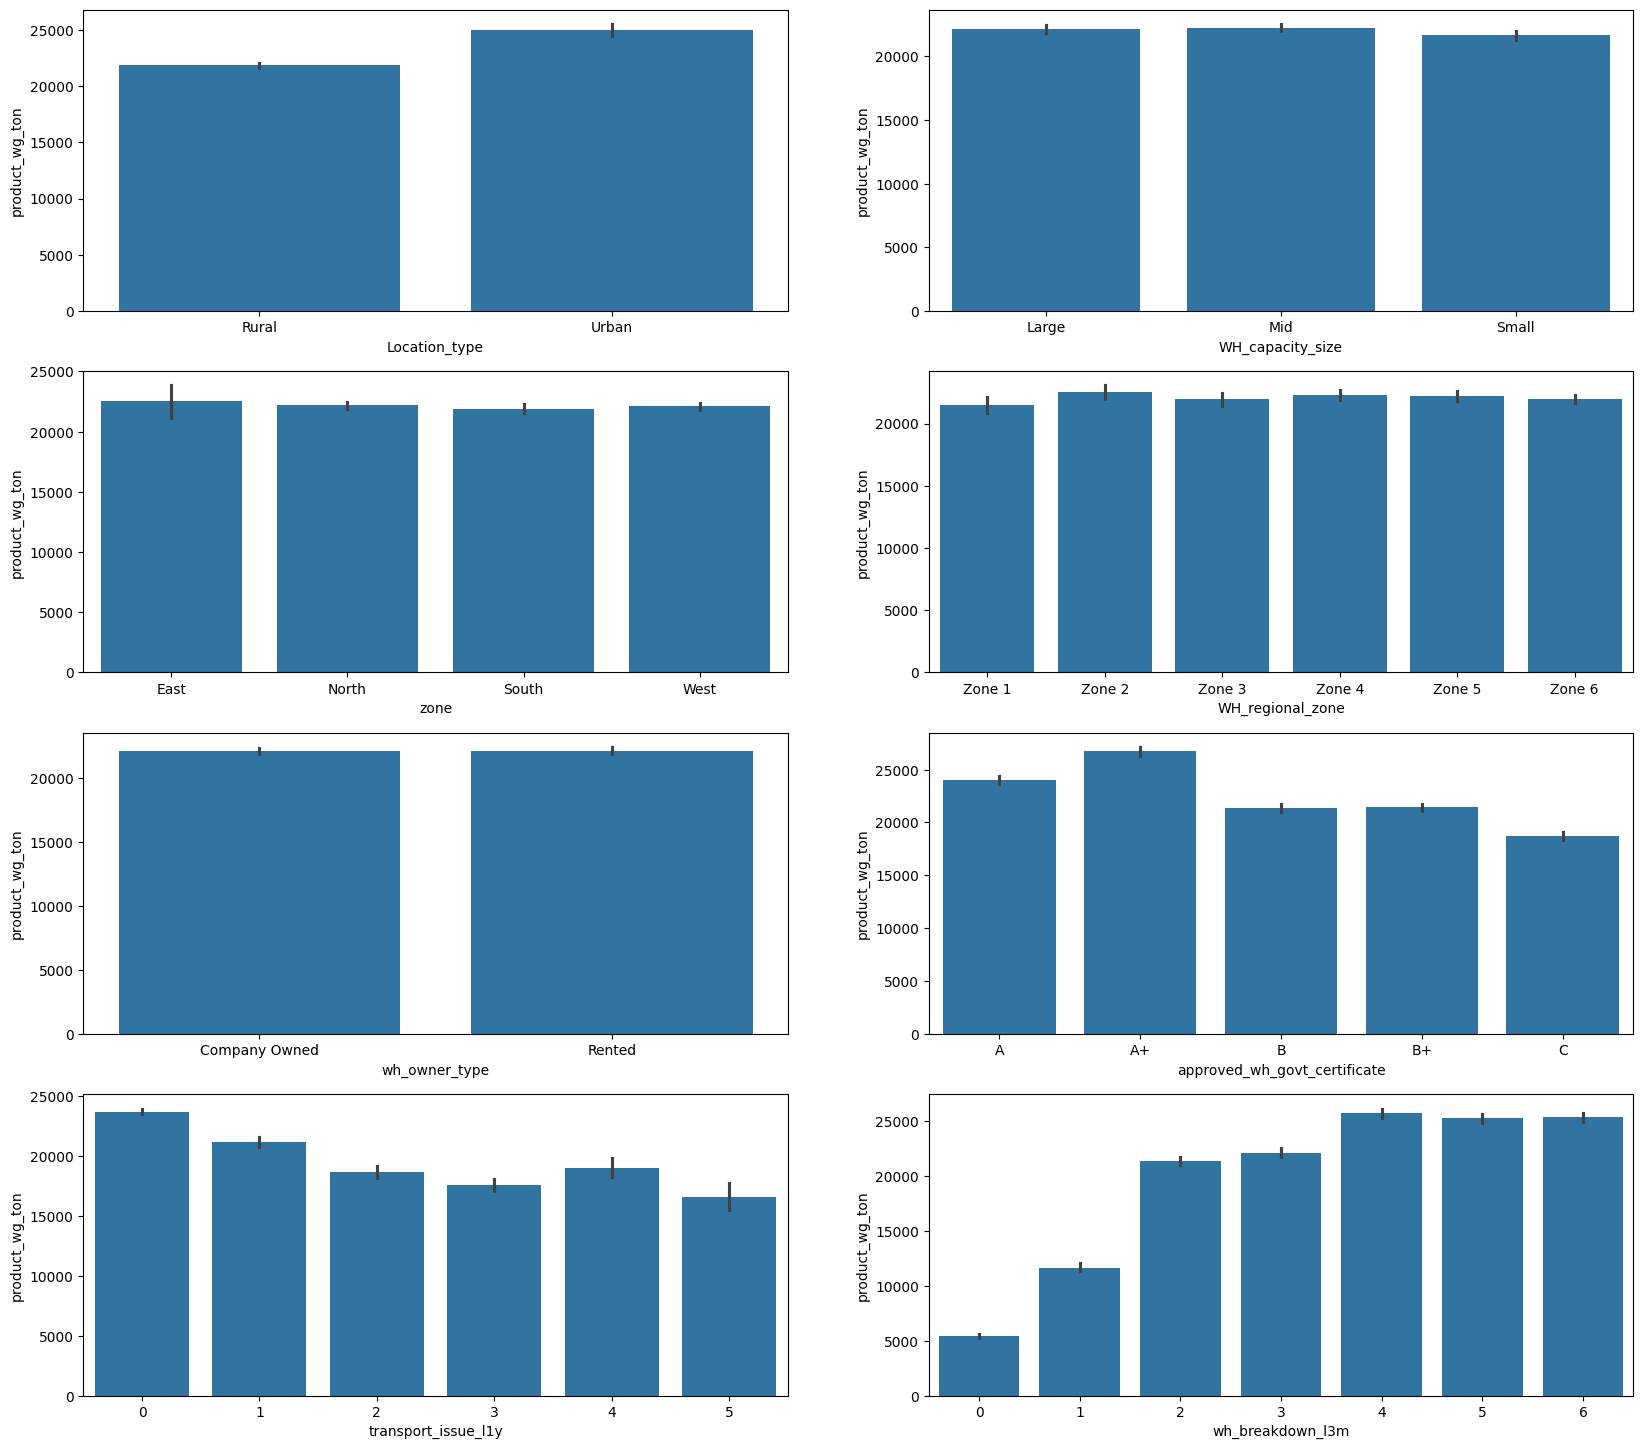

In [50]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(20,18)
sns.barplot(x='Location_type',y='product_wg_ton', data=df,ax=axes[0][0])
sns.barplot(x='WH_capacity_size',y='product_wg_ton', data=df,ax=axes[0][1])
sns.barplot(x='zone',y='product_wg_ton', data=df,ax=axes[1][0])
sns.barplot(x='WH_regional_zone',y='product_wg_ton', data=df,ax=axes[1][1])
sns.barplot(x='wh_owner_type',y='product_wg_ton', data=df,ax=axes[2][0])
sns.barplot(x='approved_wh_govt_certificate',y='product_wg_ton', data=df,ax=axes[2][1])
sns.barplot(x='transport_issue_l1y',y='product_wg_ton', data=df,ax=axes[3][0])
sns.barplot(x='wh_breakdown_l3m',y='product_wg_ton', data=df,ax=axes[3][1])
plt.show()

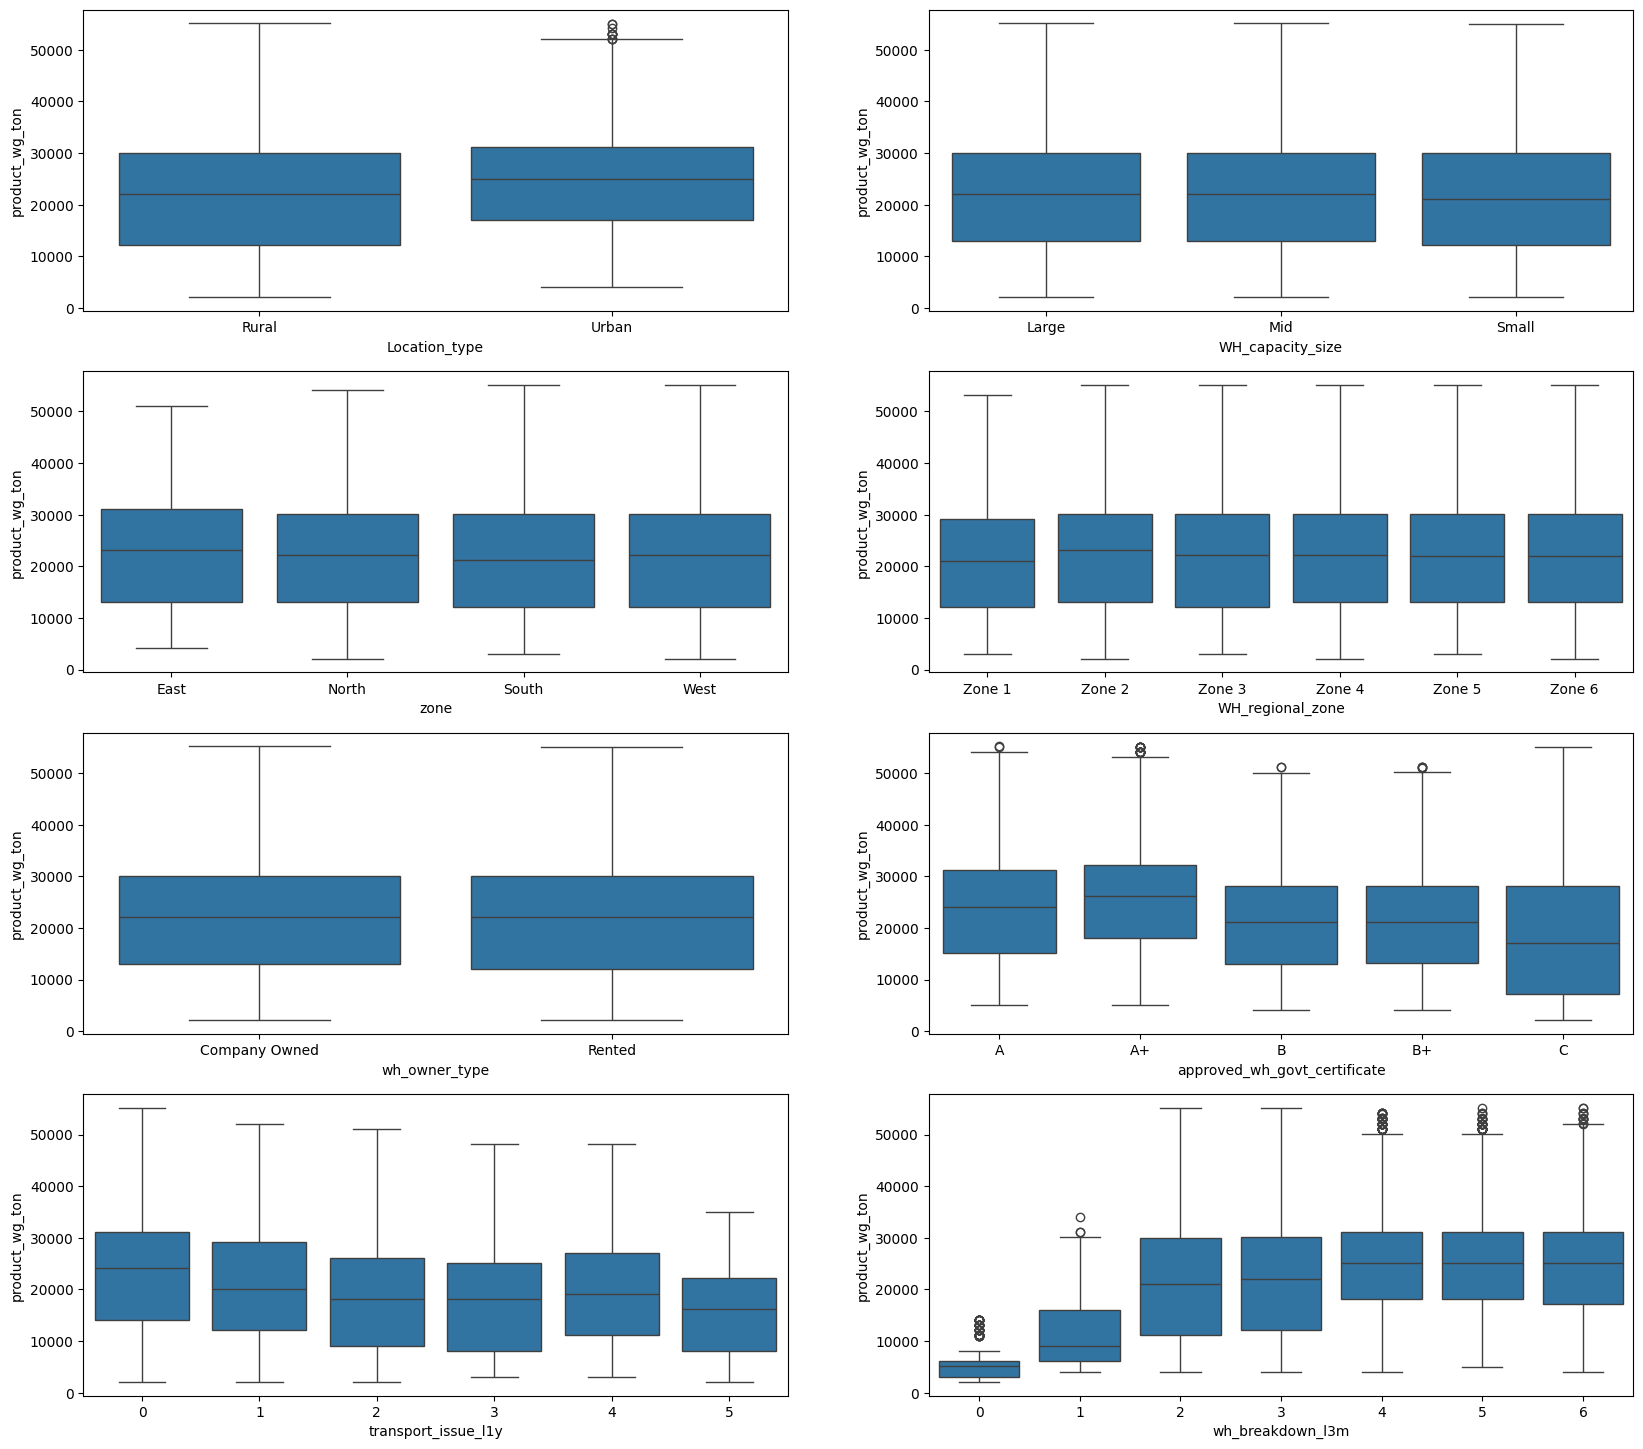

In [51]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(20,18)
sns.boxplot(x='Location_type',y='product_wg_ton', data=df, ax=axes[0][0])
sns.boxplot(x='WH_capacity_size',y='product_wg_ton', data=df, ax=axes[0][1])
sns.boxplot(x='zone',y='product_wg_ton', data=df, ax=axes[1][0])
sns.boxplot(x='WH_regional_zone',y='product_wg_ton', data=df, ax=axes[1][1])
sns.boxplot(x='wh_owner_type',y='product_wg_ton', data=df, ax=axes[2][0])
sns.boxplot(x='approved_wh_govt_certificate',y='product_wg_ton', data=df, ax=axes[2][1])
sns.boxplot(x='transport_issue_l1y',y='product_wg_ton', data=df, ax=axes[3][0])
sns.boxplot(x='wh_breakdown_l3m',y='product_wg_ton', data=df,ax=axes[3][1])
plt.show()

### 2. Categorical vs Numerical Analysis

#### * Box Plot: WH_capacity_size vs product_wg_ton

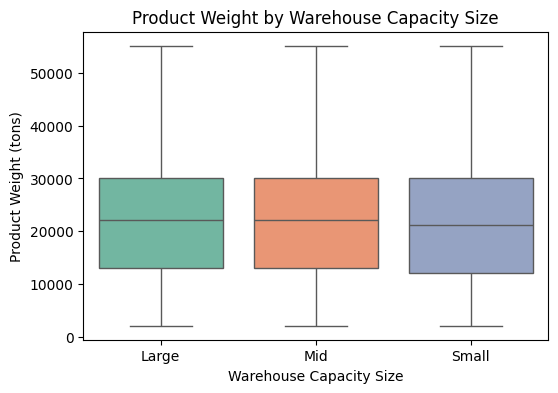

In [52]:
plt.figure(figsize=(6,4))
sns.boxplot(x='WH_capacity_size', y='product_wg_ton', data=df,hue='WH_capacity_size', palette='Set2')
plt.title('Product Weight by Warehouse Capacity Size')
plt.xlabel('Warehouse Capacity Size')
plt.ylabel('Product Weight (tons)')
plt.show()

#### * Bar Plot: Location_type vs Average product_wg_ton

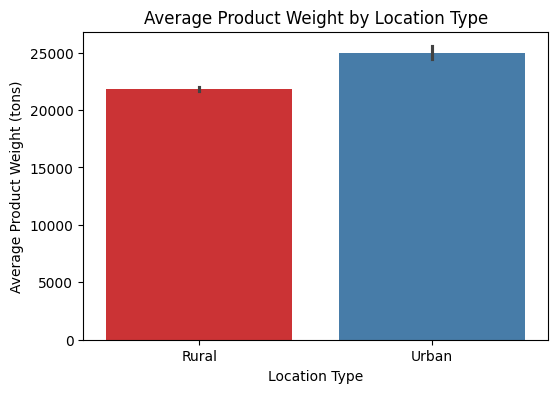

In [53]:
plt.figure(figsize=(6,4))
sns.barplot(x='Location_type', y='product_wg_ton', data=df, hue='Location_type', palette='Set1', legend=False, estimator=np.mean)
plt.title('Average Product Weight by Location Type')
plt.xlabel('Location Type')
plt.ylabel('Average Product Weight (tons)')
plt.show()

### 3. Categorical vs Categorical Analysis

#### * Count Plot: Location_type vs wh_owner_type

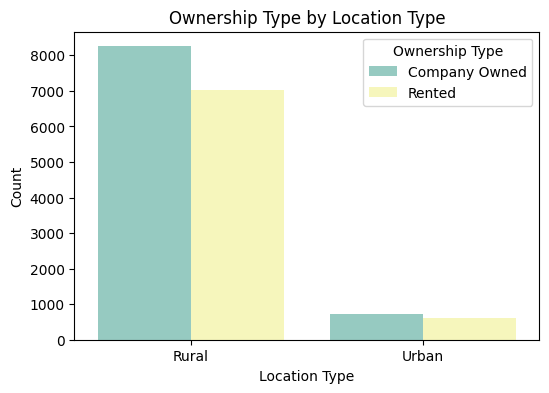

In [54]:
plt.figure(figsize=(6,4))
sns.countplot(x='Location_type', hue='wh_owner_type', data=df, palette='Set3')
plt.title('Ownership Type by Location Type')
plt.xlabel('Location Type')
plt.ylabel('Count')
plt.legend(title='Ownership Type')
plt.show()

## Multivariate Analysis

### Multivariate Analysis is a statistical technique used to analyze data that involves more than two variables simultaneously. It helps uncover relationships, patterns, and interactions between multiple variables in a dataset. Multivariate analysis is particularly useful when you want to understand how several variables influence each other or a target variable.

#### Pair Plot For the Dataset

In [55]:
# sns.pairplot(df,diag_kind = "kde")
# plt.suptitle('Pair Plot of the dataset')
# plt.show()

### * Correlation Heatmap

#### correlation is the relationship between two variables , it,s range is -1 to 1 , when the correlation is 0 there is no relationship between the variables, when its -1 the both variables are in opposite direction , when its 1 the variables are in same direction, 1 is the exact direction , Heat map is the visualization technikue of the correlation

In [56]:
# Correlation matrix for numerical variables
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
num_refill_req_l3m,1.000000,0.023180,0.019149,-0.005090,0.001944,-0.015214,-0.006015,0.001104,-0.000909,-0.013827,-0.008875,0.256853,0.000249,-0.008354,-0.000646
transport_issue_l1y,0.023180,1.000000,-0.010148,0.000400,0.002275,-0.009324,0.002377,-0.008770,0.009382,-0.006779,-0.152709,0.009052,0.014092,0.001738,-0.183150
Competitor_in_mkt,0.019149,-0.010148,1.000000,-0.155607,0.004282,0.012223,-0.004563,-0.008485,0.014434,-0.013648,0.011957,0.016640,0.014849,-0.040299,0.010854
retail_shop_num,-0.005090,0.000400,-0.155607,1.000000,-0.005892,-0.010186,0.001207,-0.008503,-0.000910,-0.009968,-0.008094,-0.002687,0.000558,0.038614,-0.008332
distributor_num,0.001944,0.002275,0.004282,-0.005892,1.000000,0.008627,-0.009270,0.001878,-0.005771,-0.009437,-0.000539,0.003390,-0.003420,-0.003020,0.001435
flood_impacted,-0.015214,-0.009324,0.012223,-0.010186,0.008627,1.000000,0.114835,0.168812,0.013265,0.148482,-0.001571,-0.010540,0.000643,0.000730,-0.000507
flood_proof,-0.006015,0.002377,-0.004563,0.001207,-0.009270,0.114835,1.000000,0.118690,-0.003997,0.044652,-0.004752,0.005102,-0.004836,-0.009568,-0.003862
electric_supply,0.001104,-0.008770,-0.008485,-0.008503,0.001878,0.168812,0.118690,1.000000,-0.000506,0.331202,-0.000652,-0.003375,-0.015071,-0.005347,-0.001533
dist_from_hub,-0.000909,0.009382,0.014434,-0.000910,-0.005771,0.013265,-0.003997,-0.000506,1.000000,-0.013023,-0.011496,0.002281,0.002410,0.003403,-0.011380
workers_num,-0.013827,-0.006779,-0.013648,-0.009968,-0.009437,0.148482,0.044652,0.331202,-0.013023,1.000000,-0.005700,0.002896,-0.012389,-0.009073,-0.005446


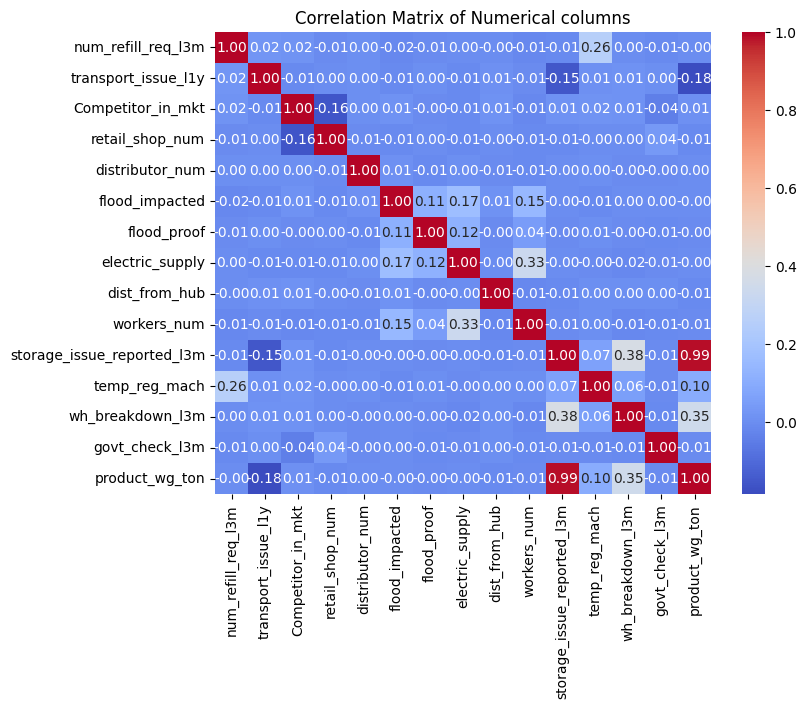

In [57]:
## Heatmap for correlation
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical columns')
plt.show()

## Feature Engineering

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Location_type                 16620 non-null  category
 1   WH_capacity_size              16620 non-null  category
 2   zone                          16620 non-null  category
 3   WH_regional_zone              16620 non-null  category
 4   num_refill_req_l3m            16620 non-null  int64   
 5   transport_issue_l1y           16620 non-null  int64   
 6   Competitor_in_mkt             16620 non-null  int64   
 7   retail_shop_num               16620 non-null  int64   
 8   wh_owner_type                 16620 non-null  category
 9   distributor_num               16620 non-null  int64   
 10  flood_impacted                16620 non-null  int64   
 11  flood_proof                   16620 non-null  int64   
 12  electric_supply               16620 non-null  

In [59]:
df. WH_regional_zone 

0        Zone 6
1        Zone 5
2        Zone 2
3        Zone 3
4        Zone 5
          ...  
16615    Zone 6
16616    Zone 5
16617    Zone 6
16618    Zone 6
16619    Zone 5
Name: WH_regional_zone, Length: 16620, dtype: category
Categories (6, object): ['Zone 1', 'Zone 2', 'Zone 3', 'Zone 4', 'Zone 5', 'Zone 6']

In [60]:
df['WH_regional_zone'] = df['WH_regional_zone'].apply(lambda x:x[-1])
df. WH_regional_zone = pd.to_numeric(df. WH_regional_zone)

In [61]:
df. WH_regional_zone 

0        6
1        5
2        2
3        3
4        5
        ..
16615    6
16616    5
16617    6
16618    6
16619    5
Name: WH_regional_zone, Length: 16620, dtype: int64

###  using pd.get_dummies() to convert object datatype columns into numerical columns:

In [62]:
categ_columns = df.select_dtypes(include=['category']).columns
print("category columns:", categ_columns)

category columns: Index(['Location_type', 'WH_capacity_size', 'zone', 'wh_owner_type',
       'approved_wh_govt_certificate'],
      dtype='object')


In [63]:
cat_list=[ 'Location_type', 'WH_capacity_size',
       'zone', 'wh_owner_type', 'approved_wh_govt_certificate']

In [64]:
df1 = pd.get_dummies(df, columns=cat_list,drop_first=True,prefix=cat_list)
df1.head()

,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,...,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C
0,6,3,1,2,4651,24,0,1,1,91,...,False,True,False,False,True,True,False,False,False,False
1,5,0,0,4,6217,47,0,0,1,210,...,False,False,True,False,False,False,False,False,False,False
2,2,1,0,4,4306,64,0,0,0,161,...,True,False,False,True,False,False,False,False,False,False
3,3,7,4,2,6000,50,0,0,0,103,...,True,False,True,False,False,True,True,False,False,False
4,5,3,1,2,4740,42,1,0,1,112,...,False,False,True,False,False,False,False,False,False,True


In [65]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   WH_regional_zone                 16620 non-null  int64  
 1   num_refill_req_l3m               16620 non-null  int64  
 2   transport_issue_l1y              16620 non-null  int64  
 3   Competitor_in_mkt                16620 non-null  int64  
 4   retail_shop_num                  16620 non-null  int64  
 5   distributor_num                  16620 non-null  int64  
 6   flood_impacted                   16620 non-null  int64  
 7   flood_proof                      16620 non-null  int64  
 8   electric_supply                  16620 non-null  int64  
 9   dist_from_hub                    16620 non-null  int64  
 10  workers_num                      16620 non-null  float64
 11  storage_issue_reported_l3m       16620 non-null  int64  
 12  temp_reg_mach     

In [66]:
bool_col = df1.select_dtypes(include=['bool']).columns
bool_col

Index(['Location_type_Urban', 'WH_capacity_size_Mid', 'WH_capacity_size_Small',
       'zone_North', 'zone_South', 'zone_West', 'wh_owner_type_Rented',
       'approved_wh_govt_certificate_A+', 'approved_wh_govt_certificate_B',
       'approved_wh_govt_certificate_B+', 'approved_wh_govt_certificate_C'],
      dtype='object')

In [67]:
df1

,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,...,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C
0,6,3,1,2,4651,24,0,1,1,91,...,False,True,False,False,True,True,False,False,False,False
1,5,0,0,4,6217,47,0,0,1,210,...,False,False,True,False,False,False,False,False,False,False
2,2,1,0,4,4306,64,0,0,0,161,...,True,False,False,True,False,False,False,False,False,False
3,3,7,4,2,6000,50,0,0,0,103,...,True,False,True,False,False,True,True,False,False,False
4,5,3,1,2,4740,42,1,0,1,112,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,6,3,1,6,4779,70,0,0,0,240,...,False,False,False,False,True,True,False,False,True,False
16616,5,2,0,2,5718,26,0,0,1,164,...,False,False,True,False,False,False,False,False,True,False
16617,6,5,0,4,4514,50,1,0,1,211,...,False,False,True,False,False,False,False,True,False,False
16618,6,3,2,3,5829,59,1,0,1,119,...,False,True,False,False,True,True,False,False,False,False


In [68]:
bool_list = ['Location_type_Urban', 'WH_capacity_size_Mid', 'WH_capacity_size_Small',
       'zone_North', 'zone_South', 'zone_West', 'wh_owner_type_Rented',
       'approved_wh_govt_certificate_A+', 'approved_wh_govt_certificate_B',
       'approved_wh_govt_certificate_B+', 'approved_wh_govt_certificate_C']

In [69]:
df1[bool_list] = df1[bool_list].astype(int)
df1

,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,...,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C
0,6,3,1,2,4651,24,0,1,1,91,...,0,1,0,0,1,1,0,0,0,0
1,5,0,0,4,6217,47,0,0,1,210,...,0,0,1,0,0,0,0,0,0,0
2,2,1,0,4,4306,64,0,0,0,161,...,1,0,0,1,0,0,0,0,0,0
3,3,7,4,2,6000,50,0,0,0,103,...,1,0,1,0,0,1,1,0,0,0
4,5,3,1,2,4740,42,1,0,1,112,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,6,3,1,6,4779,70,0,0,0,240,...,0,0,0,0,1,1,0,0,1,0
16616,5,2,0,2,5718,26,0,0,1,164,...,0,0,1,0,0,0,0,0,1,0
16617,6,5,0,4,4514,50,1,0,1,211,...,0,0,1,0,0,0,0,1,0,0
16618,6,3,2,3,5829,59,1,0,1,119,...,0,1,0,0,1,1,0,0,0,0


In [70]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   WH_regional_zone                 16620 non-null  int64  
 1   num_refill_req_l3m               16620 non-null  int64  
 2   transport_issue_l1y              16620 non-null  int64  
 3   Competitor_in_mkt                16620 non-null  int64  
 4   retail_shop_num                  16620 non-null  int64  
 5   distributor_num                  16620 non-null  int64  
 6   flood_impacted                   16620 non-null  int64  
 7   flood_proof                      16620 non-null  int64  
 8   electric_supply                  16620 non-null  int64  
 9   dist_from_hub                    16620 non-null  int64  
 10  workers_num                      16620 non-null  float64
 11  storage_issue_reported_l3m       16620 non-null  int64  
 12  temp_reg_mach     

In [71]:
df1.columns

Index(['WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'distributor_num',
       'flood_impacted', 'flood_proof', 'electric_supply', 'dist_from_hub',
       'workers_num', 'storage_issue_reported_l3m', 'temp_reg_mach',
       'wh_breakdown_l3m', 'govt_check_l3m', 'product_wg_ton',
       'Location_type_Urban', 'WH_capacity_size_Mid', 'WH_capacity_size_Small',
       'zone_North', 'zone_South', 'zone_West', 'wh_owner_type_Rented',
       'approved_wh_govt_certificate_A+', 'approved_wh_govt_certificate_B',
       'approved_wh_govt_certificate_B+', 'approved_wh_govt_certificate_C'],
      dtype='object')

In [72]:
 df1['workers_num']

0        29.0
1        31.0
2        37.0
3        21.0
4        25.0
         ... 
16615    19.0
16616    30.0
16617    24.0
16618    28.0
16619    34.0
Name: workers_num, Length: 16620, dtype: float64

In [73]:
df1.dtypes

WH_regional_zone                     int64
num_refill_req_l3m                   int64
transport_issue_l1y                  int64
Competitor_in_mkt                    int64
retail_shop_num                      int64
distributor_num                      int64
flood_impacted                       int64
flood_proof                          int64
electric_supply                      int64
dist_from_hub                        int64
workers_num                        float64
storage_issue_reported_l3m           int64
temp_reg_mach                        int64
wh_breakdown_l3m                     int64
govt_check_l3m                       int64
product_wg_ton                       int64
Location_type_Urban                  int64
WH_capacity_size_Mid                 int64
WH_capacity_size_Small               int64
zone_North                           int64
zone_South                           int64
zone_West                            int64
wh_owner_type_Rented                 int64
approved_wh

In [74]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   WH_regional_zone                 16620 non-null  int64  
 1   num_refill_req_l3m               16620 non-null  int64  
 2   transport_issue_l1y              16620 non-null  int64  
 3   Competitor_in_mkt                16620 non-null  int64  
 4   retail_shop_num                  16620 non-null  int64  
 5   distributor_num                  16620 non-null  int64  
 6   flood_impacted                   16620 non-null  int64  
 7   flood_proof                      16620 non-null  int64  
 8   electric_supply                  16620 non-null  int64  
 9   dist_from_hub                    16620 non-null  int64  
 10  workers_num                      16620 non-null  float64
 11  storage_issue_reported_l3m       16620 non-null  int64  
 12  temp_reg_mach     

In [75]:
df1

,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,...,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C
0,6,3,1,2,4651,24,0,1,1,91,...,0,1,0,0,1,1,0,0,0,0
1,5,0,0,4,6217,47,0,0,1,210,...,0,0,1,0,0,0,0,0,0,0
2,2,1,0,4,4306,64,0,0,0,161,...,1,0,0,1,0,0,0,0,0,0
3,3,7,4,2,6000,50,0,0,0,103,...,1,0,1,0,0,1,1,0,0,0
4,5,3,1,2,4740,42,1,0,1,112,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,6,3,1,6,4779,70,0,0,0,240,...,0,0,0,0,1,1,0,0,1,0
16616,5,2,0,2,5718,26,0,0,1,164,...,0,0,1,0,0,0,0,0,1,0
16617,6,5,0,4,4514,50,1,0,1,211,...,0,0,1,0,0,0,0,1,0,0
16618,6,3,2,3,5829,59,1,0,1,119,...,0,1,0,0,1,1,0,0,0,0


### Correlation Heatmap after encoding

In [76]:
cor_mat = df1.corr()
cor_mat

,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,...,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C
WH_regional_zone,1.000000,0.003844,0.000187,0.026047,-0.023541,-0.000401,-0.000192,0.002694,0.004987,0.002403,...,-0.562094,-0.101671,0.146211,-0.189192,0.029845,-0.000060,-0.005804,0.009213,0.006972,-0.005125
num_refill_req_l3m,0.003844,1.000000,0.023180,0.019149,-0.005090,0.001944,-0.015214,-0.006015,0.001104,-0.000909,...,0.008876,-0.007010,-0.018794,0.001386,0.018271,0.008047,0.000932,0.005968,0.001576,-0.007185
transport_issue_l1y,0.000187,0.023180,1.000000,-0.010148,0.000400,0.002275,-0.009324,0.002377,-0.008770,0.009382,...,0.003440,0.013681,0.008592,-0.000671,-0.007862,-0.003021,-0.015783,-0.002598,0.013965,-0.007529
Competitor_in_mkt,0.026047,0.019149,-0.010148,1.000000,-0.155607,0.004282,0.012223,-0.004563,-0.008485,0.014434,...,0.010686,0.011112,-0.089170,-0.304493,0.310656,-0.004041,-0.000530,0.000521,-0.004383,-0.003002
retail_shop_num,-0.023541,-0.005090,0.000400,-0.155607,1.000000,-0.005892,-0.010186,0.001207,-0.008503,-0.000910,...,-0.020170,0.078871,0.046036,0.019773,-0.062920,0.006320,-0.005251,0.012902,0.000551,-0.004018
distributor_num,-0.000401,0.001944,0.002275,0.004282,-0.005892,1.000000,0.008627,-0.009270,0.001878,-0.005771,...,0.003953,0.000226,-0.002215,-0.000348,0.005097,-0.002247,0.007679,0.001814,-0.012387,-0.000644
flood_impacted,-0.000192,-0.015214,-0.009324,0.012223,-0.010186,0.008627,1.000000,0.114835,0.168812,0.013265,...,-0.000069,0.012076,0.011285,-0.007517,-0.001899,-0.116968,-0.003509,-0.012829,0.003176,-0.002541
flood_proof,0.002694,-0.006015,0.002377,-0.004563,0.001207,-0.009270,0.114835,1.000000,0.118690,-0.003997,...,0.005971,-0.003636,-0.012727,0.000866,0.010651,-0.033205,0.001248,-0.006206,-0.009630,0.001595
electric_supply,0.004987,0.001104,-0.008770,-0.008485,-0.008503,0.001878,0.168812,0.118690,1.000000,-0.000506,...,-0.009656,-0.001644,0.006473,0.002883,-0.007440,-0.227646,-0.005772,-0.004936,0.007771,0.000794
dist_from_hub,0.002403,-0.000909,0.009382,0.014434,-0.000910,-0.005771,0.013265,-0.003997,-0.000506,1.000000,...,0.003927,-0.003898,-0.009245,0.009029,0.002990,-0.002871,-0.000472,0.000683,0.002498,-0.004992


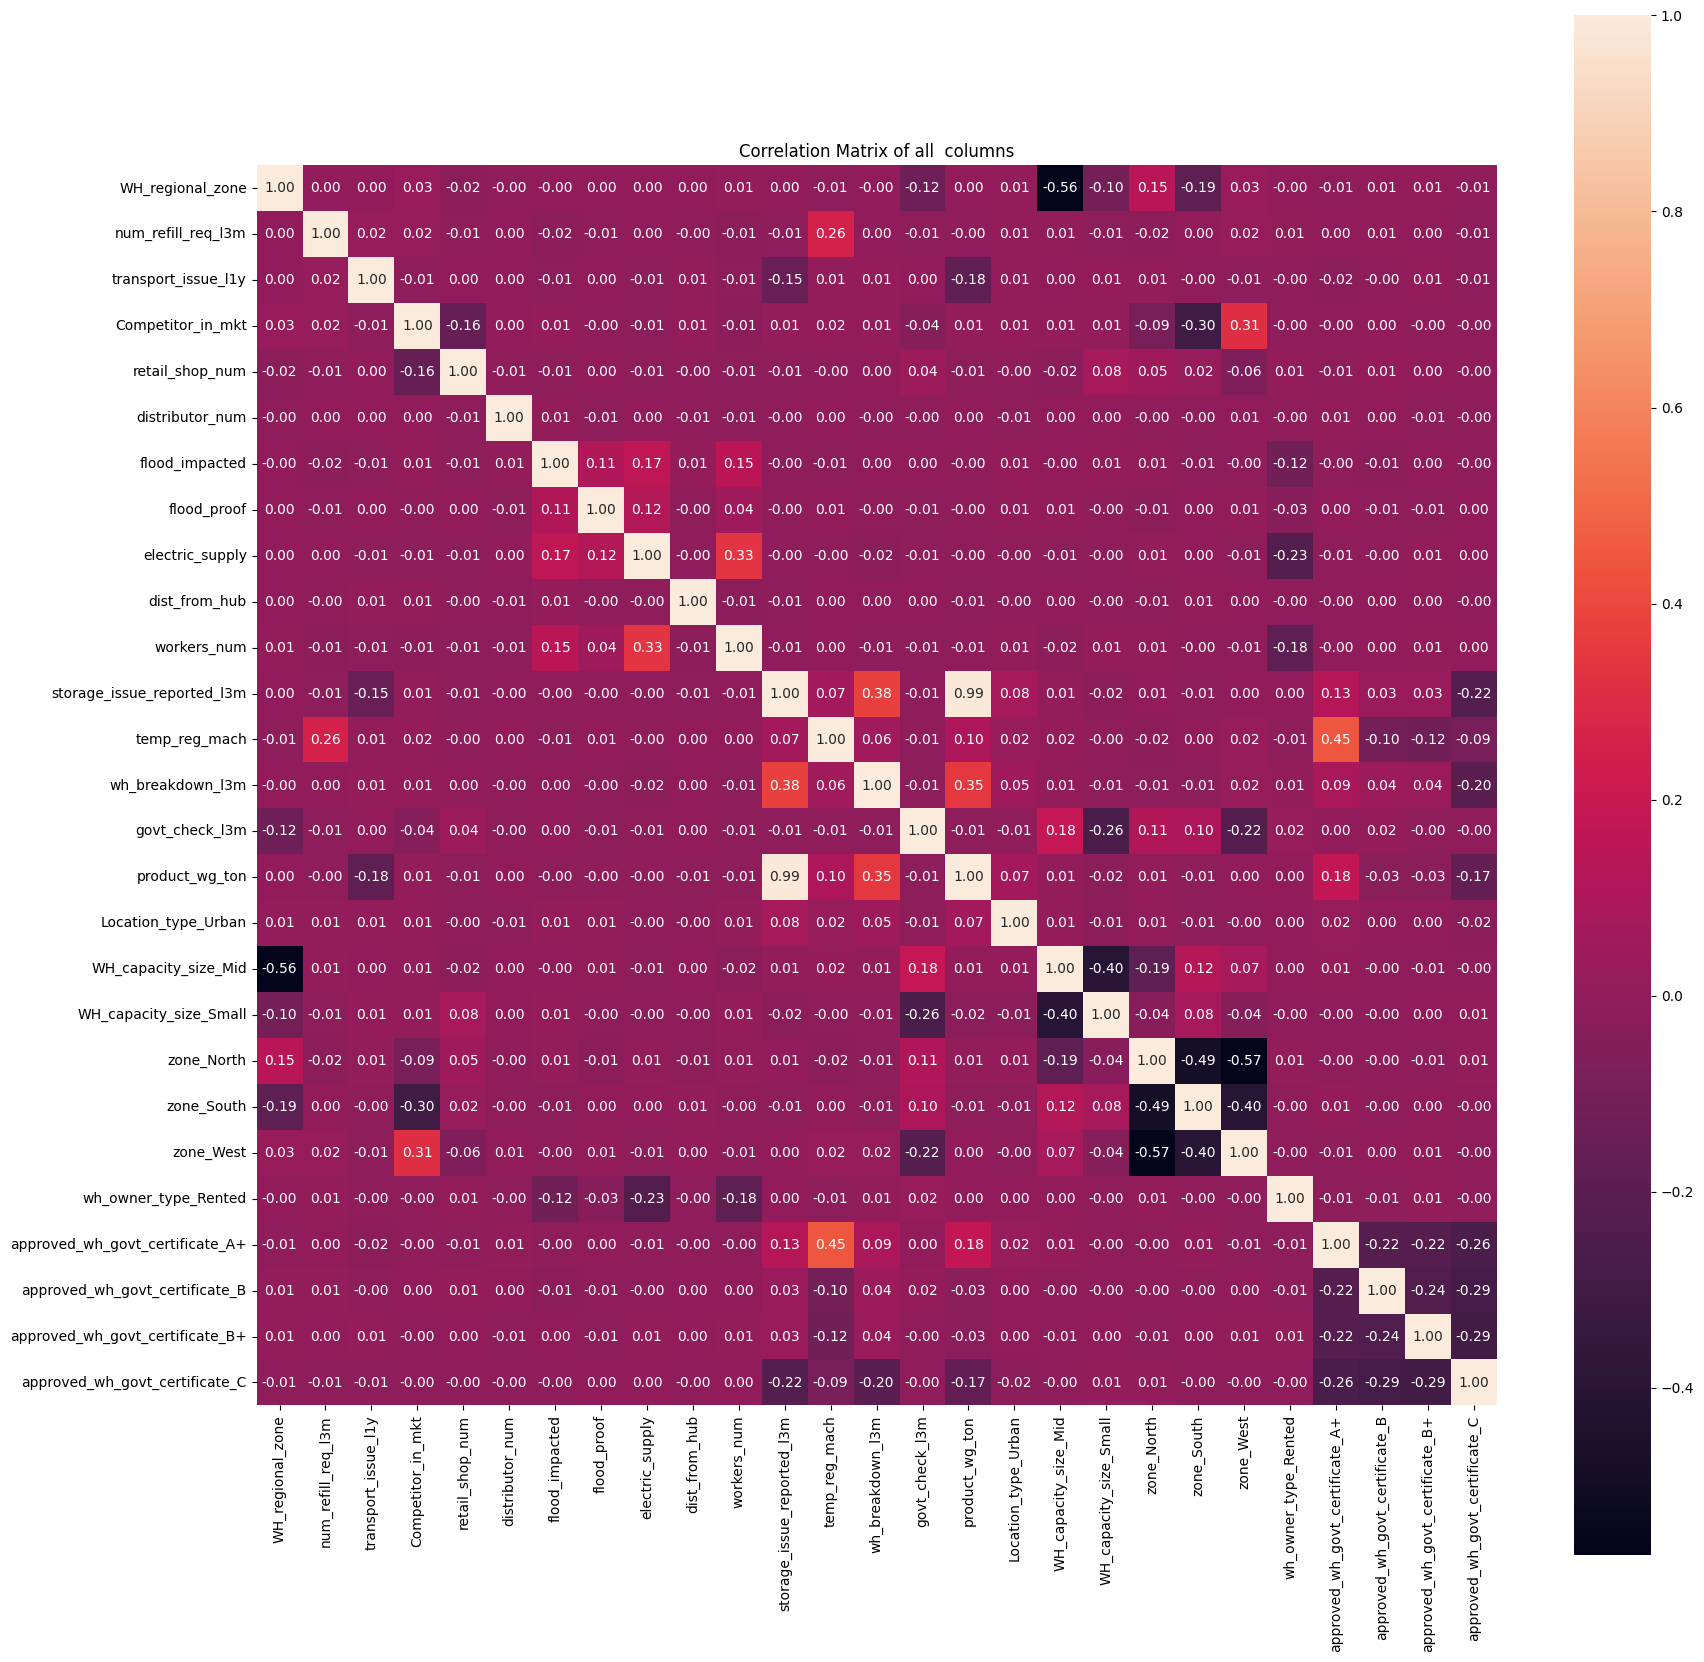

In [77]:
plt.figure(figsize=(20,20))
sns.heatmap(cor_mat, cbar=True, annot=True,square=True, fmt='.2f')
plt.title('Correlation Matrix of all  columns')
plt.show()

#### Finding Outliers

In [78]:
df1.describe()

,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,...,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C
count,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,...,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000
mean,4.254392,4.126655,0.780927,3.103129,4983.904994,42.473706,0.096871,0.056017,0.655716,163.521901,...,0.402587,0.191697,0.409146,0.254091,0.320096,0.459988,0.166727,0.193742,0.196149,0.254934
std,1.666568,2.606241,1.206351,1.147711,1051.032239,16.090000,0.295791,0.229961,0.475149,62.701193,...,0.490434,0.393648,0.491691,0.435362,0.466527,0.498411,0.372743,0.395241,0.397095,0.435837
min,1.000000,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,2.000000,4309.000000,29.000000,0.000000,0.000000,0.000000,109.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,4.000000,0.000000,3.000000,4856.000000,42.000000,0.000000,0.000000,1.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.000000,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,6.000000,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [79]:
Q1 = df1.quantile(0.25)
print("The Q1 is :",Q1)


Q3 = df1.quantile(0.75)
print("The Q3 is :",Q3)


IQR = Q3 - Q1
print("IQR is =",IQR)

The Q1 is : WH_regional_zone                       3.0
num_refill_req_l3m                     2.0
transport_issue_l1y                    0.0
Competitor_in_mkt                      2.0
retail_shop_num                     4309.0
distributor_num                       29.0
flood_impacted                         0.0
flood_proof                            0.0
electric_supply                        0.0
dist_from_hub                        109.0
workers_num                           24.0
storage_issue_reported_l3m            10.0
temp_reg_mach                          0.0
wh_breakdown_l3m                       2.0
govt_check_l3m                        11.0
product_wg_ton                     13057.0
Location_type_Urban                    0.0
WH_capacity_size_Mid                   0.0
WH_capacity_size_Small                 0.0
zone_North                             0.0
zone_South                             0.0
zone_West                              0.0
wh_owner_type_Rented                   0.0

In [80]:
LB = Q1 - 1.5*IQR
print("The Lower Bound is =",LB)

UB = Q3 + 1.5*IQR
print("The upper Bound is =",UB)

The Lower Bound is = WH_regional_zone                      -1.5
num_refill_req_l3m                    -4.0
transport_issue_l1y                   -1.5
Competitor_in_mkt                     -1.0
retail_shop_num                     2522.5
distributor_num                      -11.5
flood_impacted                         0.0
flood_proof                            0.0
electric_supply                       -1.5
dist_from_hub                        -54.5
workers_num                           10.5
storage_issue_reported_l3m           -11.0
temp_reg_mach                         -1.5
wh_breakdown_l3m                      -2.5
govt_check_l3m                       -11.5
product_wg_ton                    -12512.0
Location_type_Urban                    0.0
WH_capacity_size_Mid                  -1.5
WH_capacity_size_Small                 0.0
zone_North                            -1.5
zone_South                            -1.5
zone_West                             -1.5
wh_owner_type_Rented             

#### Outliers

In [81]:
outliers = df1[(df1<LB)|(df1>UB)]
print(outliers)

       WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0                   NaN                 NaN                  NaN   
1                   NaN                 NaN                  NaN   
2                   NaN                 NaN                  NaN   
3                   NaN                 NaN                  4.0   
4                   NaN                 NaN                  NaN   
...                 ...                 ...                  ...   
16615               NaN                 NaN                  NaN   
16616               NaN                 NaN                  NaN   
16617               NaN                 NaN                  NaN   
16618               NaN                 NaN                  NaN   
16619               NaN                 NaN                  NaN   

       Competitor_in_mkt  retail_shop_num  distributor_num  flood_impacted  \
0                    NaN              NaN              NaN             NaN   
1                    NaN   

In [82]:
no_outliers = df1[(df1>=LB)&(df1<=UB)]
no_outliers

,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,...,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C
0,6,3,1.0,2.0,4651.0,24,0.0,NaN,1,91,...,0,NaN,0,0,1,1,0.0,0.0,0.0,0
1,5,0,0.0,4.0,6217.0,47,0.0,0.0,1,210,...,0,0.0,1,0,0,0,0.0,0.0,0.0,0
2,2,1,0.0,4.0,4306.0,64,0.0,0.0,0,161,...,1,0.0,0,1,0,0,0.0,0.0,0.0,0
3,3,7,NaN,2.0,6000.0,50,0.0,0.0,0,103,...,1,0.0,1,0,0,1,NaN,0.0,0.0,0
4,5,3,1.0,2.0,4740.0,42,NaN,0.0,1,112,...,0,0.0,1,0,0,0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,6,3,1.0,6.0,4779.0,70,0.0,0.0,0,240,...,0,0.0,0,0,1,1,0.0,0.0,NaN,0
16616,5,2,0.0,2.0,5718.0,26,0.0,0.0,1,164,...,0,0.0,1,0,0,0,0.0,0.0,NaN,0
16617,6,5,0.0,4.0,4514.0,50,NaN,0.0,1,211,...,0,0.0,1,0,0,0,0.0,NaN,0.0,0
16618,6,3,2.0,3.0,5829.0,59,NaN,0.0,1,119,...,0,NaN,0,0,1,1,0.0,0.0,0.0,0


### Skewness & Kurtosis

In [83]:
import scipy.stats as stats
skewnes = stats.skew(no_outliers)
print("The skewnes is =",skewnes)
kurtosis = stats.kurtosis(no_outliers)
print("The kurtosis is =",kurtosis)

The skewnes is = [-0.54428714 -0.09017406         nan         nan         nan  0.00850303
         nan         nan -0.65546113 -0.00875735         nan  0.11641579
  0.84125888 -0.07645912 -0.34851045  0.33620858         nan  0.39726342
         nan  0.36957003  1.12970693  0.77126948  0.16056307         nan
         nan         nan  1.12461077]
The kurtosis is = [-0.98209202 -1.21553397         nan         nan         nan -1.18986601
         nan         nan -1.57037071 -1.20185897         nan -0.67461716
 -1.29228349 -0.95056352 -1.05702698 -0.49248248         nan -1.84218178
         nan -1.86341799 -0.72376226 -1.40514339 -1.9742195          nan
         nan         nan -0.73525062]


### Z SCORE Method
#### The threshold is set to 3, which is a common cutoff for identifying outliers. A z-score greater than 3 (or less than -3) indicates that the data point is more than 3 standard deviations away from the mean, which is considered unusual or an outlier

In [84]:
z_score = np.abs(stats.zscore(df1))
threshold = 3

outliers = df1[(z_score>threshold)]
outliers

,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,...,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16617,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16618,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
z_score = np.abs(stats.zscore(df1))
threshold = 3

non_outliers = df1[(z_score<threshold)]
non_outliers

,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,...,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C
0,6,3,1.0,2.0,4651.0,24,0.0,NaN,1,91,...,0,1,0,0,1,1,0,0,0,0
1,5,0,0.0,4.0,6217.0,47,0.0,0.0,1,210,...,0,0,1,0,0,0,0,0,0,0
2,2,1,0.0,4.0,4306.0,64,0.0,0.0,0,161,...,1,0,0,1,0,0,0,0,0,0
3,3,7,4.0,2.0,6000.0,50,0.0,0.0,0,103,...,1,0,1,0,0,1,1,0,0,0
4,5,3,1.0,2.0,4740.0,42,NaN,0.0,1,112,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,6,3,1.0,6.0,4779.0,70,0.0,0.0,0,240,...,0,0,0,0,1,1,0,0,1,0
16616,5,2,0.0,2.0,5718.0,26,0.0,0.0,1,164,...,0,0,1,0,0,0,0,0,1,0
16617,6,5,0.0,4.0,4514.0,50,NaN,0.0,1,211,...,0,0,1,0,0,0,0,1,0,0
16618,6,3,2.0,3.0,5829.0,59,NaN,0.0,1,119,...,0,1,0,0,1,1,0,0,0,0


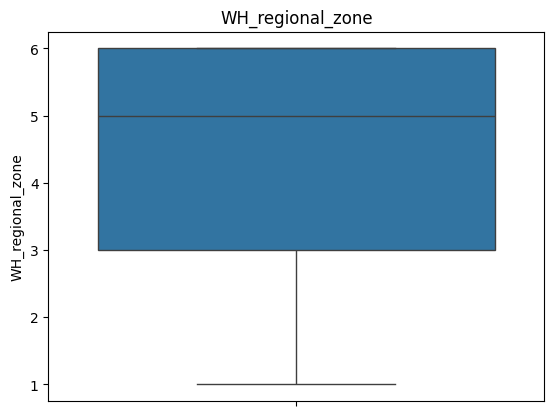

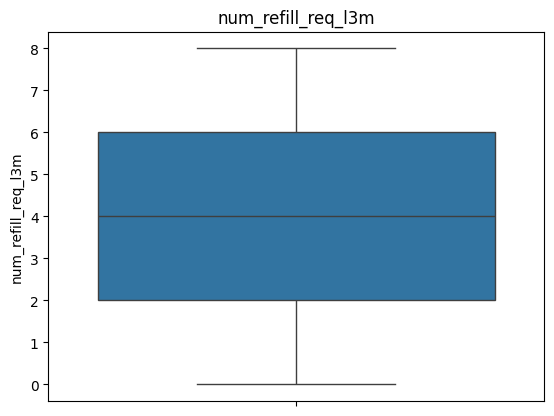

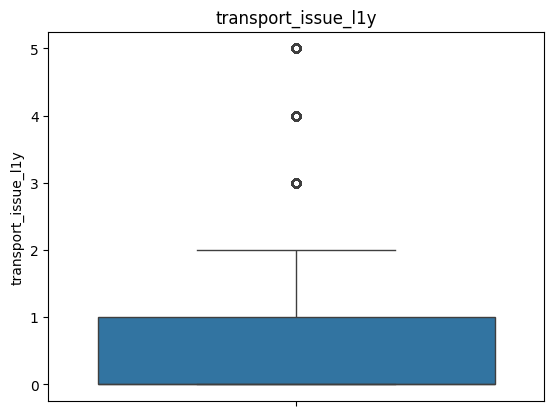

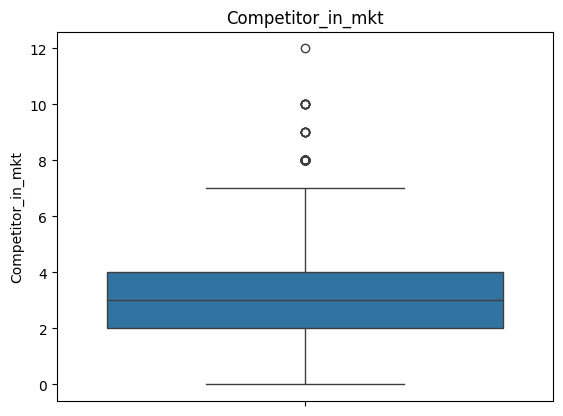

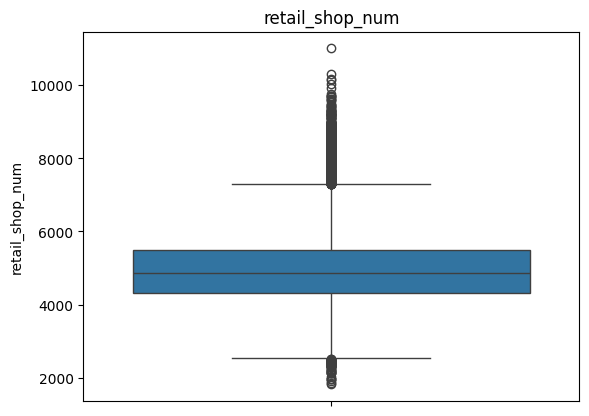

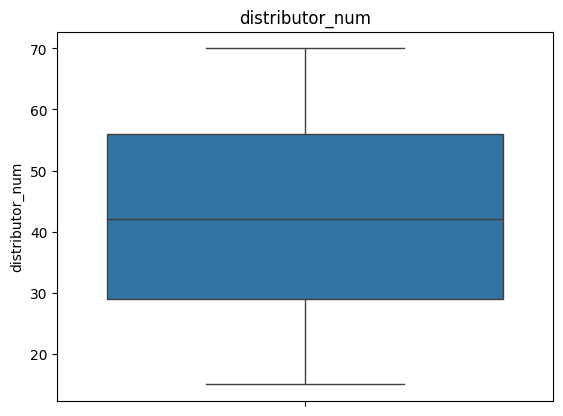

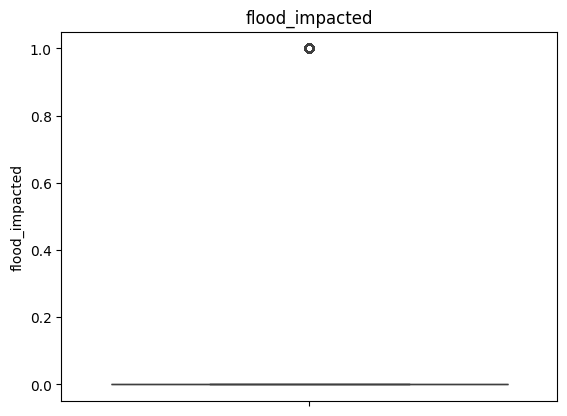

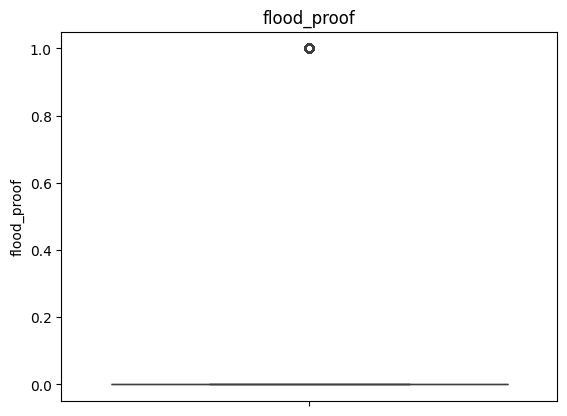

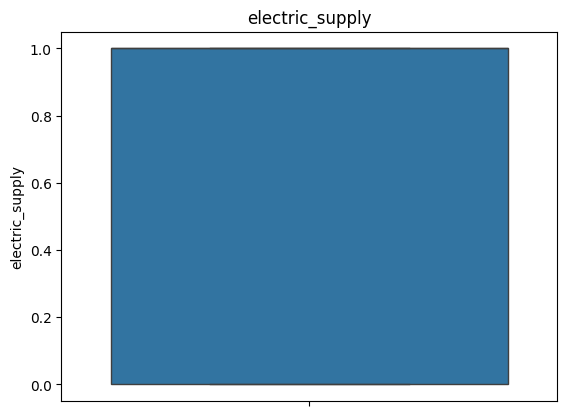

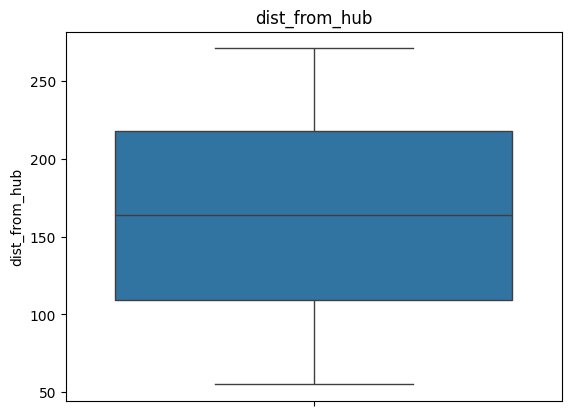

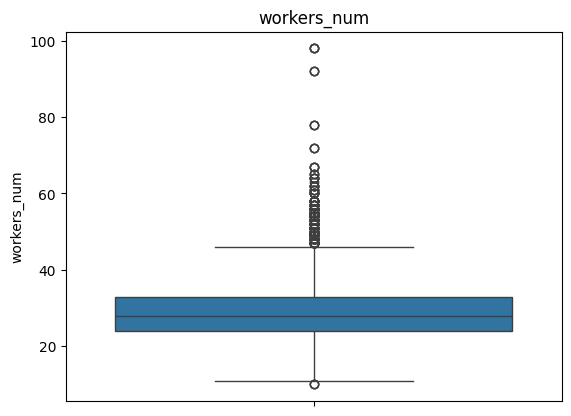

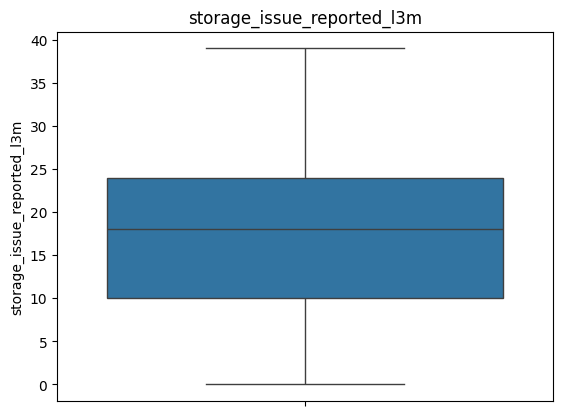

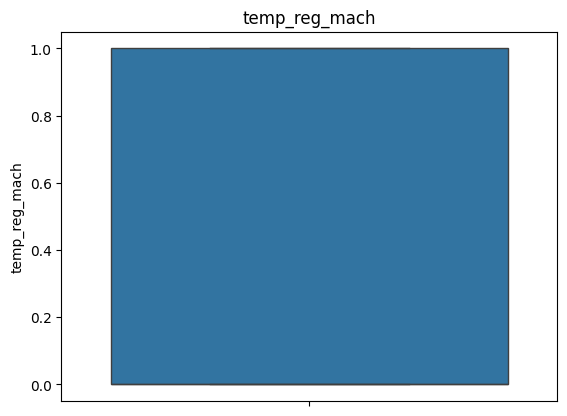

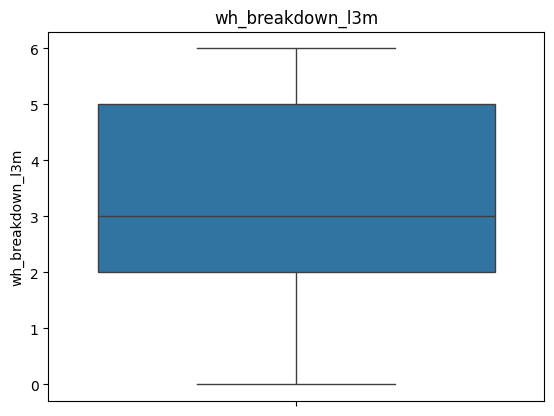

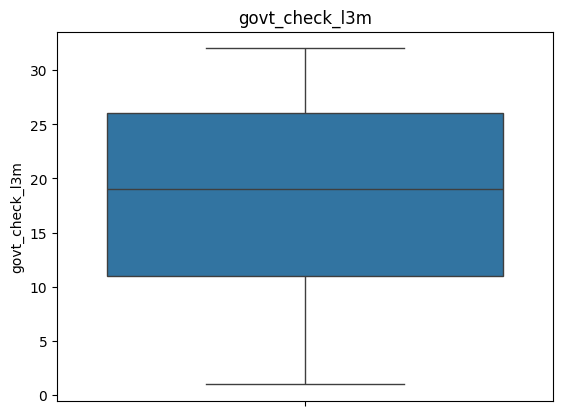

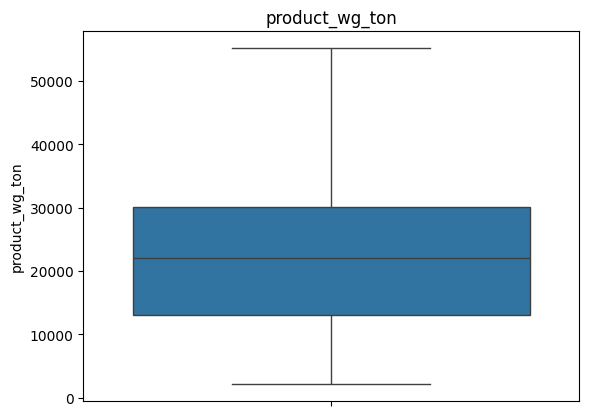

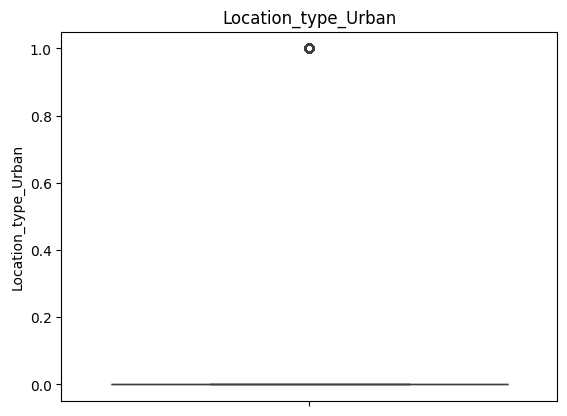

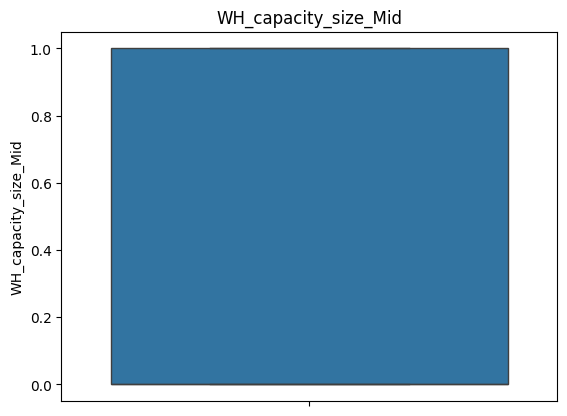

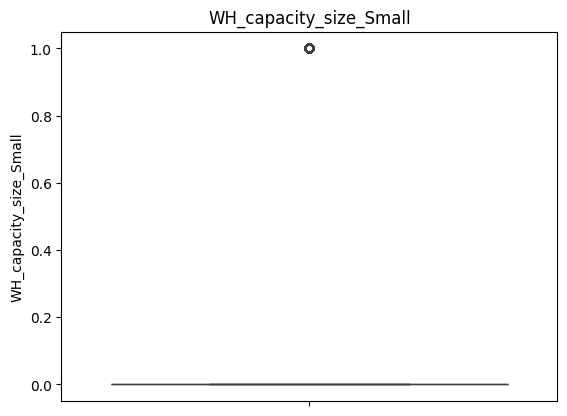

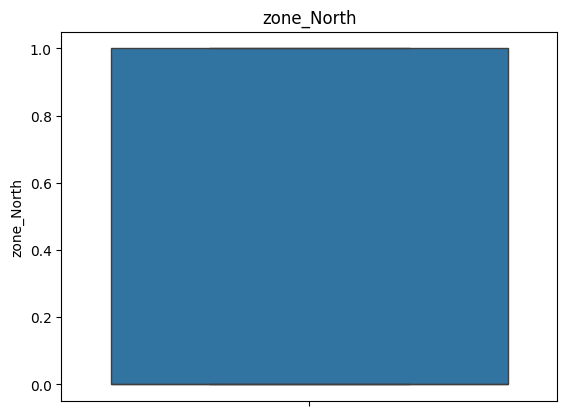

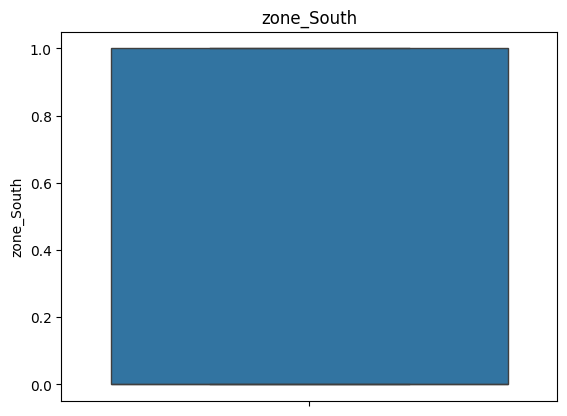

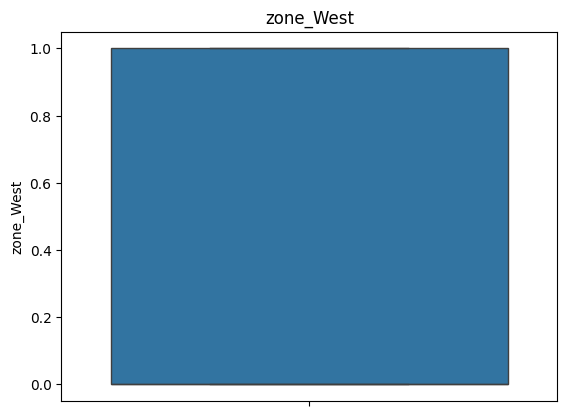

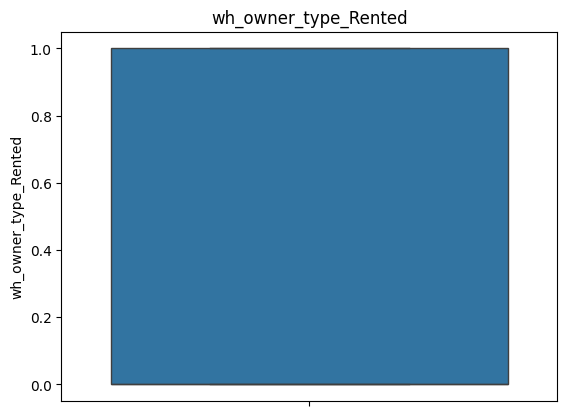

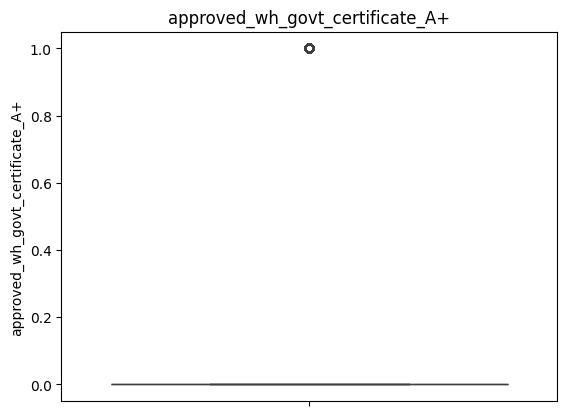

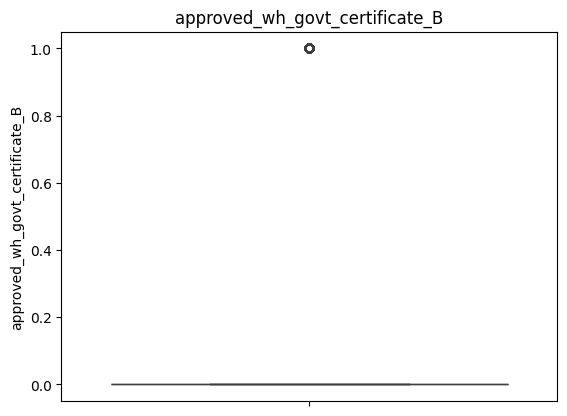

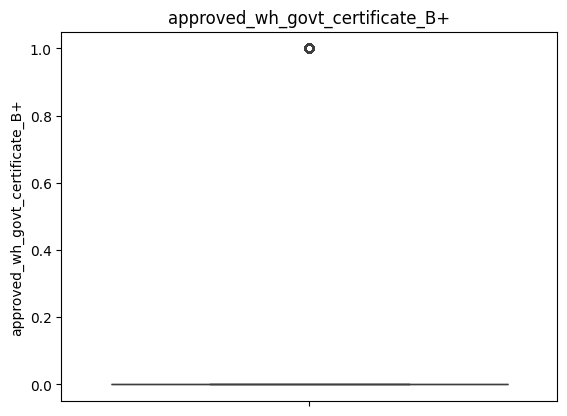

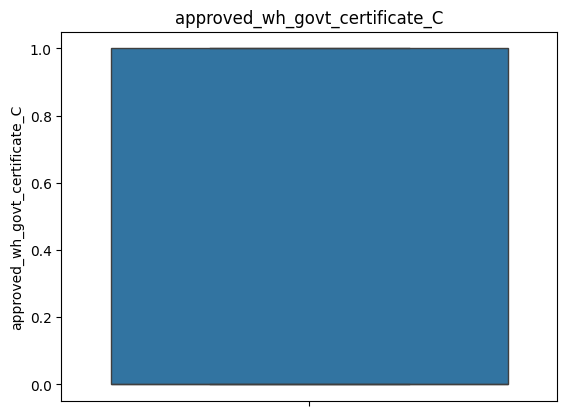

In [86]:
for i in df1.columns:
    sns.boxplot(df1[i])
    plt.title(i)
    plt.show()

### Splitting the independend and dependent variable

In [87]:
df1

,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,...,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C
0,6,3,1,2,4651,24,0,1,1,91,...,0,1,0,0,1,1,0,0,0,0
1,5,0,0,4,6217,47,0,0,1,210,...,0,0,1,0,0,0,0,0,0,0
2,2,1,0,4,4306,64,0,0,0,161,...,1,0,0,1,0,0,0,0,0,0
3,3,7,4,2,6000,50,0,0,0,103,...,1,0,1,0,0,1,1,0,0,0
4,5,3,1,2,4740,42,1,0,1,112,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,6,3,1,6,4779,70,0,0,0,240,...,0,0,0,0,1,1,0,0,1,0
16616,5,2,0,2,5718,26,0,0,1,164,...,0,0,1,0,0,0,0,0,1,0
16617,6,5,0,4,4514,50,1,0,1,211,...,0,0,1,0,0,0,0,1,0,0
16618,6,3,2,3,5829,59,1,0,1,119,...,0,1,0,0,1,1,0,0,0,0


In [88]:
x = df1.drop(columns = 'product_wg_ton')
x

,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,...,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,wh_owner_type_Rented,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C
0,6,3,1,2,4651,24,0,1,1,91,...,0,1,0,0,1,1,0,0,0,0
1,5,0,0,4,6217,47,0,0,1,210,...,0,0,1,0,0,0,0,0,0,0
2,2,1,0,4,4306,64,0,0,0,161,...,1,0,0,1,0,0,0,0,0,0
3,3,7,4,2,6000,50,0,0,0,103,...,1,0,1,0,0,1,1,0,0,0
4,5,3,1,2,4740,42,1,0,1,112,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,6,3,1,6,4779,70,0,0,0,240,...,0,0,0,0,1,1,0,0,1,0
16616,5,2,0,2,5718,26,0,0,1,164,...,0,0,1,0,0,0,0,0,1,0
16617,6,5,0,4,4514,50,1,0,1,211,...,0,0,1,0,0,0,0,1,0,0
16618,6,3,2,3,5829,59,1,0,1,119,...,0,1,0,0,1,1,0,0,0,0


In [89]:
y = df1.product_wg_ton
y

0        17115
1         5074
2        23137
3        22115
4        24071
         ...  
16615    16094
16616    21113
16617    28117
16618    21103
16619    38097
Name: product_wg_ton, Length: 16620, dtype: int64

In [90]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state = 42)

### Standardization

In [91]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale

StandardScaler()

In [92]:
x_train = scale.fit_transform(x_train)
x_test = scale.fit_transform(x_test)

### Building Machine learning Models

#### 1.Linear Regression

In [93]:
from sklearn.linear_model import LinearRegression
l_regr = LinearRegression()

In [94]:
l_regr.fit(x_train,y_train)

LinearRegression()

In [95]:
acrcy = l_regr.score(x_test,y_test)
acrcy

0.9846166918300748

#### 2.Descision Tree

In [97]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

In [98]:
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [99]:
model.score(x_test,y_test)

0.9867497117656142

#### 3.Random Forest

In [100]:
from sklearn.ensemble import RandomForestRegressor
modl = RandomForestRegressor(n_estimators = 5)  
modl.fit(x_train,y_train)

RandomForestRegressor(n_estimators=5)

In [101]:
modl.score(x_test,y_test)

0.9915590010198995

#### 4.SVM

In [102]:
from sklearn.svm import SVR
s_model = SVR(kernel = 'linear')
s_model.fit(x_train,y_train)

SVR(kernel='linear')

In [103]:
s_model.score(x_test,y_test)

0.940541525680841

#### 5.KNN

In [104]:
from sklearn.neighbors import KNeighborsRegressor
classifier=KNeighborsRegressor(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(x_train,y_train)

KNeighborsRegressor()

In [105]:
classifier.score(x_test,y_test)

0.6707699005742209

In [106]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [107]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    r2score = r2_score(true,predicted)
    return mae,mse,r2score

In [108]:
models = {
    "1.Linear Regression" : LinearRegression(),
    "2.K-Neighbors Regressor" : KNeighborsRegressor(),
    "3.Desicion Tree" : DecisionTreeRegressor(),
    "4.Random Forest Regressor" : RandomForestRegressor(),
    "5. Support Vector Machine (SVM)" : SVR(kernel = 'linear')
}

model_list = []
r2_list = []

for model_name,model in models.items():
    model.fit(x_train,y_train) ## Train model

    ## Make Prediction
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    ## Evaluate Train and Test Dataset
    model_train_mae,model_train_rmse,model_train_r2 = evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2 = evaluate_model(y_test,y_test_pred)

    print(model_name)

    print('Model Performance for Training set')
    print("-Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("-Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("-R2 Score: {:.4f}".format(model_train_r2))

    print("------------------------------------------------")

    print('Model Performance for Test set')
    print("-Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("-Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("-R2 Score: {:.4f}".format(model_test_r2))

    print("------------------------------------------------")
    print("------------------------------------------------")

    model_list.append(model_name)
    r2_list.append(model_test_r2)


1.Linear Regression
Model Performance for Training set
-Root Mean Squared Error: 1934063.6624
-Mean Absolute Error: 1012.4102
-R2 Score: 0.9857
------------------------------------------------
Model Performance for Test set
-Root Mean Squared Error: 2088967.8327
-Mean Absolute Error: 1091.1775
-R2 Score: 0.9846
------------------------------------------------
------------------------------------------------
2.K-Neighbors Regressor
Model Performance for Training set
-Root Mean Squared Error: 29772443.8894
-Mean Absolute Error: 4306.6302
-R2 Score: 0.7792
------------------------------------------------
Model Performance for Test set
-Root Mean Squared Error: 44707619.4318
-Mean Absolute Error: 5365.4233
-R2 Score: 0.6708
------------------------------------------------
------------------------------------------------
3.Desicion Tree
Model Performance for Training set
-Root Mean Squared Error: 0.0000
-Mean Absolute Error: 0.0000
-R2 Score: 1.0000
-----------------------------------------

### Overall Result

In [109]:
ov_rslt = pd.DataFrame(list(zip(model_list,r2_list)),columns = ["Model Name","R2_Score"])
ov_rslt.sort_values(by = ["R2_Score"],ascending = False)

,Model Name,R2_Score
3,4.Random Forest Regressor,0.993043
2,3.Desicion Tree,0.986978
0,1.Linear Regression,0.984617
4,5. Support Vector Machine (SVM),0.940542
1,2.K-Neighbors Regressor,0.670770


##### !!!!It's important to note that the R2 Score measures how well your models are performing.
##### A higher R2 Score indicates a better fit to the data. Based on the R2 Scores,
##### it appears that the Decision Tree and Random Forest Regressor models are performing exceptionally well on both the training and test sets, 
##### with R2 Scores close to 1.0

#### Both Random Forest and Decision Tree models have shown excellent performance on the training and test sets, with high R2 scores. However, there are a few important considerations:

#### 1)The Decision Tree model achieved a perfect R2 score of 1.0000 on the training set, but this might indicate overfitting. Its performance on the test set is also slightly lower compared to Random Forest.

#### 2)The Random Forest model has a very high R2 score on both training and test sets, indicating good generalization.

### Final Model

In [110]:
from sklearn.ensemble import RandomForestRegressor

## Initialize and train The Random Forest Regressor Model
random_forest = RandomForestRegressor(random_state = 42)
random_forest.fit(x_train,y_train)

## Make Prediction
y_train_pred_rf = random_forest.predict(x_train)
y_test_pred_rf = random_forest.predict(x_test)

## Evaluate Train and Test Dataset
model_train_mae_rf,model_train_rmse_rf,model_train_r2_rf = evaluate_model(y_train,y_train_pred_rf)
model_test_mae_rf,model_test_rmse_rf,model_test_r2_rf = evaluate_model(y_test,y_test_pred_rf)

print('Random forest Regressor Model Performance for Training set')
print("-Root Mean Squared Error: {:.4f}".format(model_train_rmse_rf))
print("-Mean Absolute Error: {:.4f}".format(model_train_mae_rf))
print("-R2 Score: {:.4f}".format(model_train_r2_rf))

print("------------------------------------------------")

print('Random forest Regressor Model Performance for Test set')
print("-Root Mean Squared Error: {:.4f}".format(model_test_rmse_rf))
print("-Mean Absolute Error: {:.4f}".format(model_test_mae_rf))
print("-R2 Score: {:.4f}".format(model_test_r2_rf))

print("------------------------------------------------")
print("------------------------------------------------")

Random forest Regressor Model Performance for Training set
-Root Mean Squared Error: 133604.5246
-Mean Absolute Error: 269.0909
-R2 Score: 0.9990
------------------------------------------------
Random forest Regressor Model Performance for Test set
-Root Mean Squared Error: 936949.6133
-Mean Absolute Error: 713.6652
-R2 Score: 0.9931
------------------------------------------------
------------------------------------------------


### Plotting Predicted Vs Actual

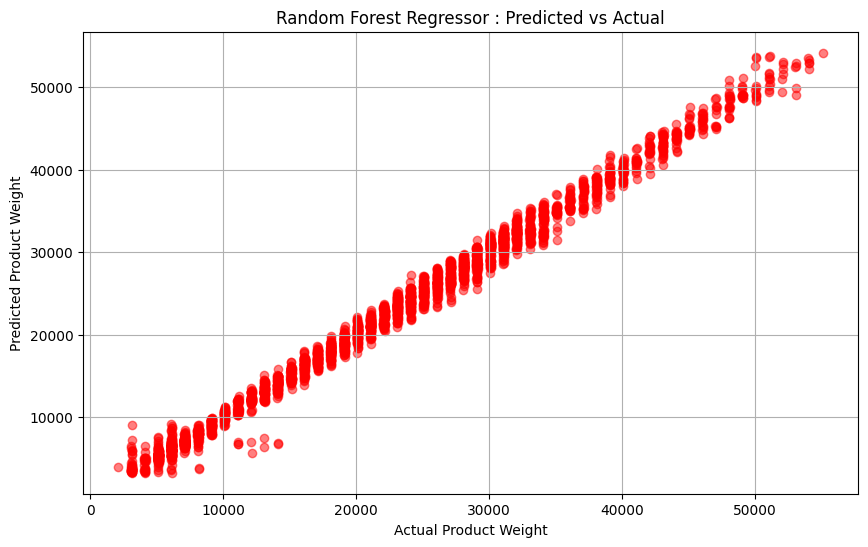

In [111]:
plt.figure(figsize = (10,6))
plt.scatter(y_test,y_test_pred_rf,color = "r",alpha = 0.5)
plt.xlabel("Actual Product Weight")
plt.ylabel("Predicted Product Weight")
plt.title("Random Forest Regressor : Predicted vs Actual")
plt.grid()
plt.show()

### Concusion

### Summary
#### The Random Forest Regressor model emerges as the optimal choice to drive data-driven decision-making and ultimately contribute to the FMCG company's success in the market.